# Superstore Dataset

The [dataset](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) contains sales data for a US superstore from October 4, 2017 - November 28, 2017.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/Users/stevenmacauda/Downloads/Sample - Superstore.xls")

## Data Cleaning

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df = df.drop(columns=['Row ID', 'Order ID', 'Customer ID'])

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df.duplicated().sum()

1

In [10]:
data=df.drop(['Country', 'Postal Code'], axis=1)
data.shape

(9994, 16)

<AxesSubplot:>

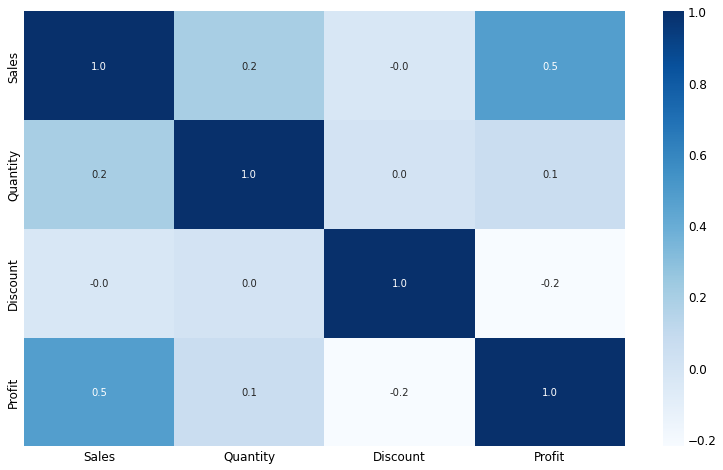

In [11]:
#Checking the corelations between numeric columns
df_con=data.select_dtypes(include=[np.number]) #getting the numeracal features
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Blues") #plotting a heatmap

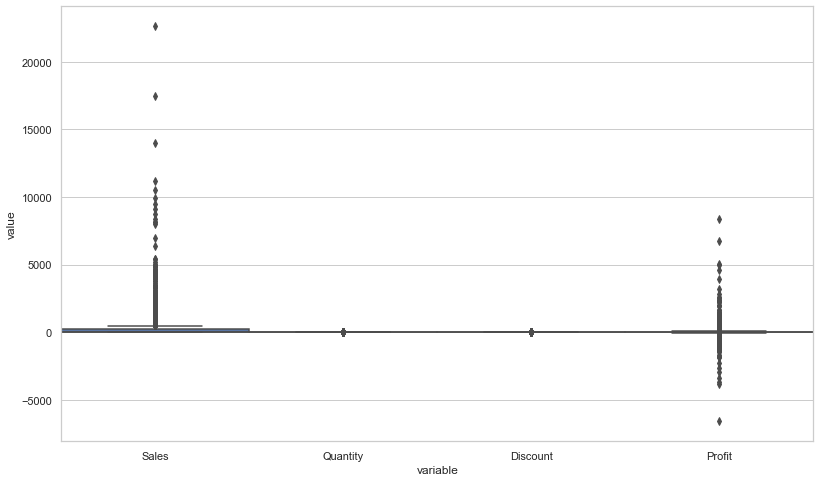

In [12]:
#BoxPlot to see the outliers clearly
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()

In [13]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [14]:
remove_outlier(data,k=3.33)

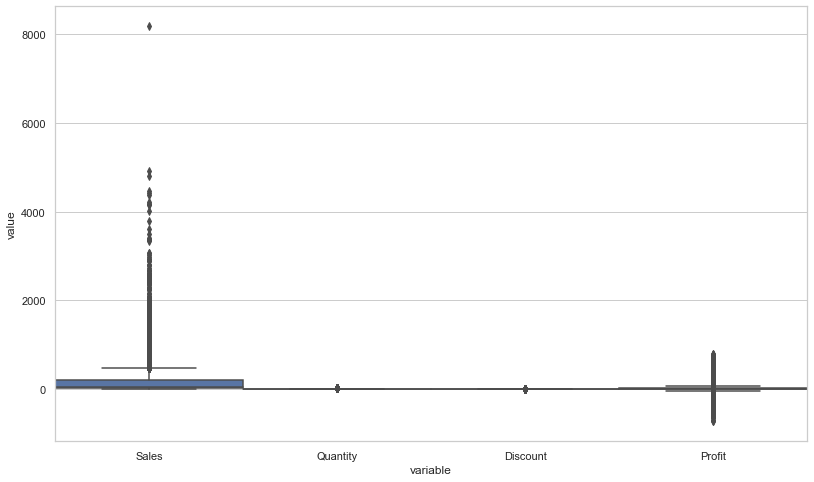

In [15]:
#Let's see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

## Data Exploration

In [16]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9906.000000,9906.000000,9906.000000,9906.000000
mean,196.334177,3.775389,0.155057,24.124557
std,383.685746,2.220942,0.204990,94.087165
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.751550
50%,52.760000,3.000000,0.200000,8.606400
75%,201.866000,5.000000,0.200000,28.847950
max,8187.650000,14.000000,0.800000,793.716000


In [17]:
#What are the numbers of unique entries in the Categorical columns
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Customer Name are 793
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Product ID are 1848
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17
Number of unique entries in Product Name are 1836


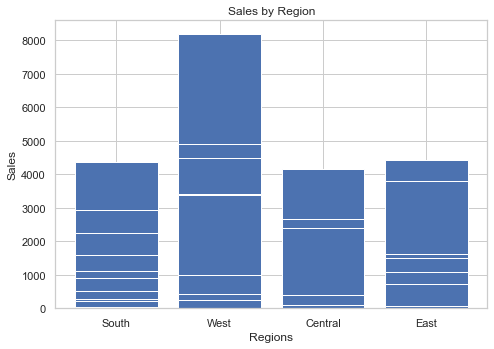

In [18]:
#Sales by region
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ds['Region'],ds['Sales'])
plt.title("Sales by Region")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

Text(0.5, 1.0, 'Top 3 Sales by Region')

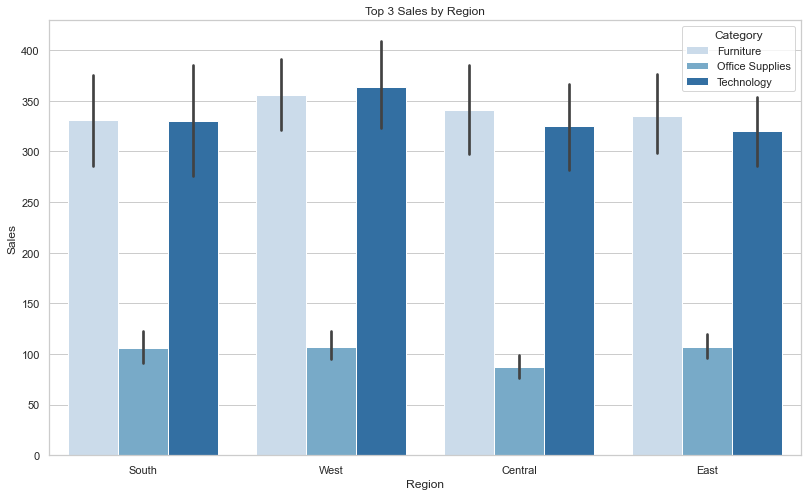

In [19]:
#Top 3 Sales by Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Blues")
plt.title('Top 3 Sales by Region')

Text(0.5, 1.0, 'Shipping by Location Type and Shipping Class')

<Figure size 1080x576 with 0 Axes>

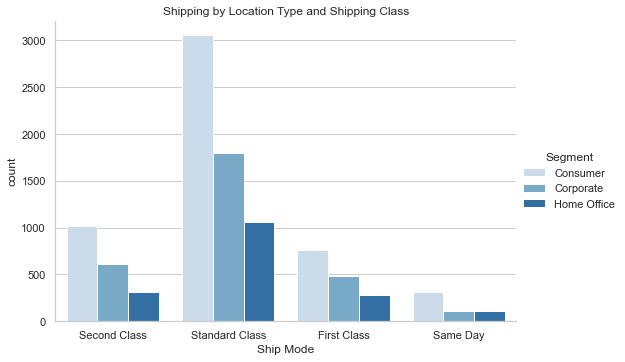

In [20]:
#Shipping by Location Type and Ship Mode
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Blues")
plt.title('Shipping by Location Type and Shipping Class')

Text(0.5, 1.0, 'Sales per Shipping Location by Region')

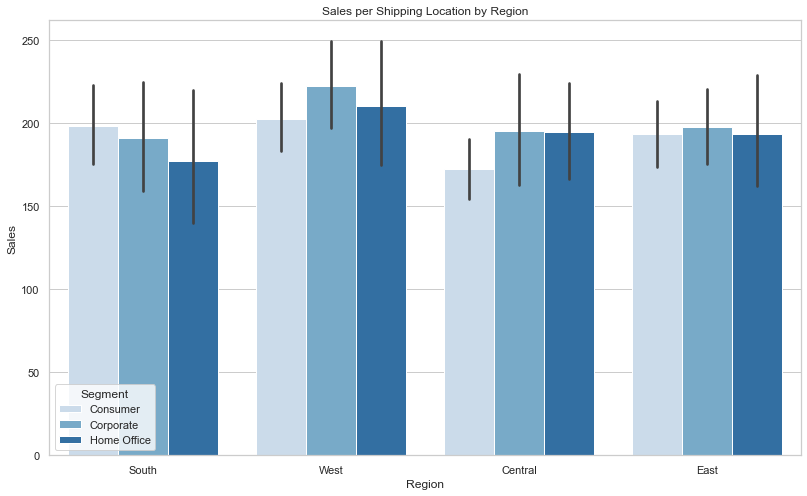

In [21]:
#Sales per Shipping Location by Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Blues")
plt.title('Sales per Shipping Location by Region')

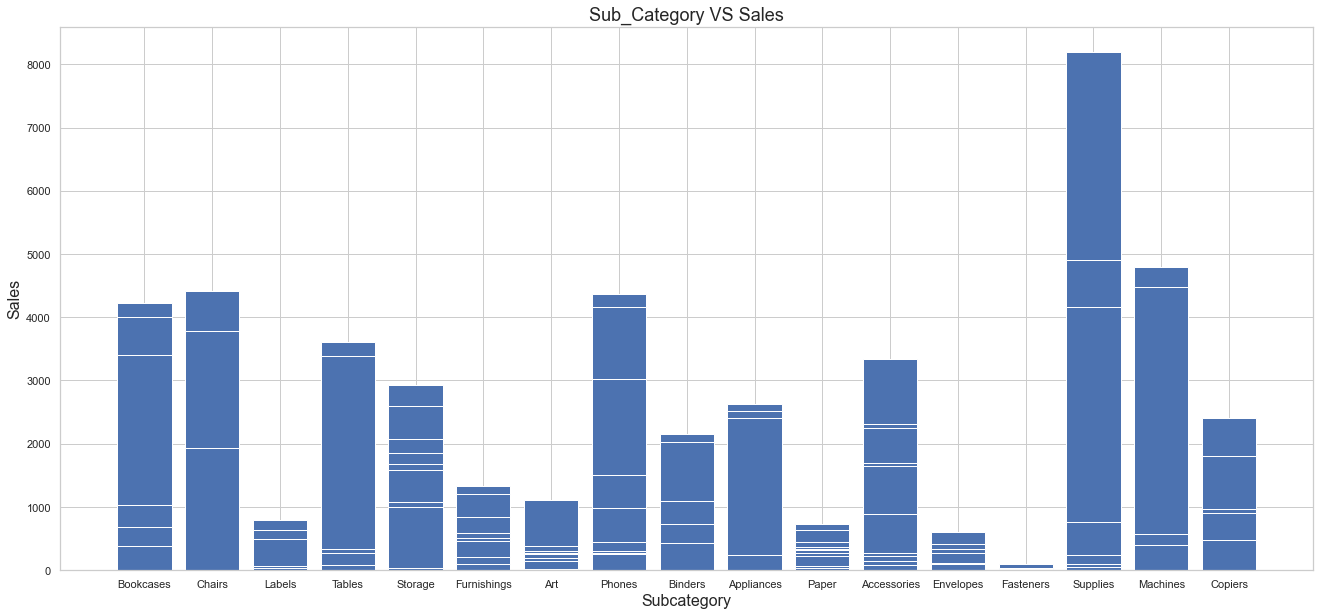

In [22]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=ds)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

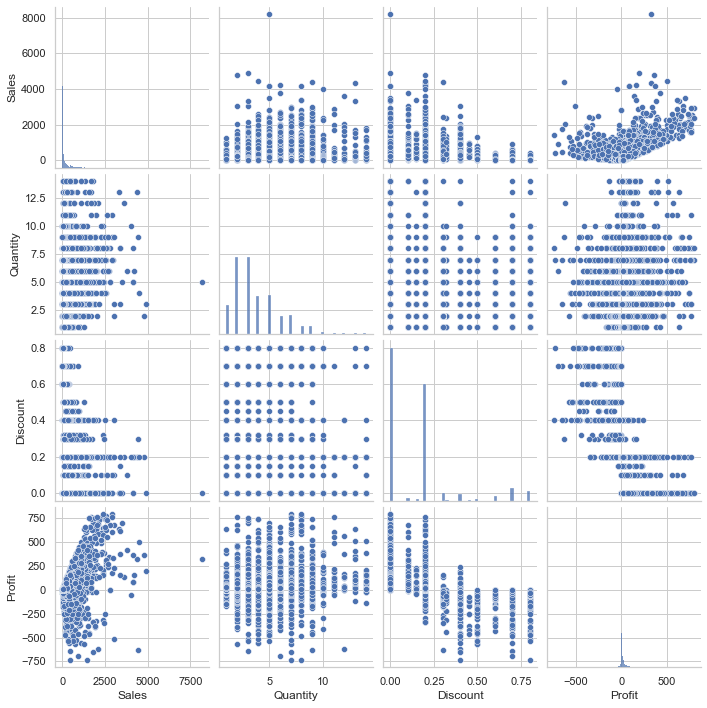

In [23]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

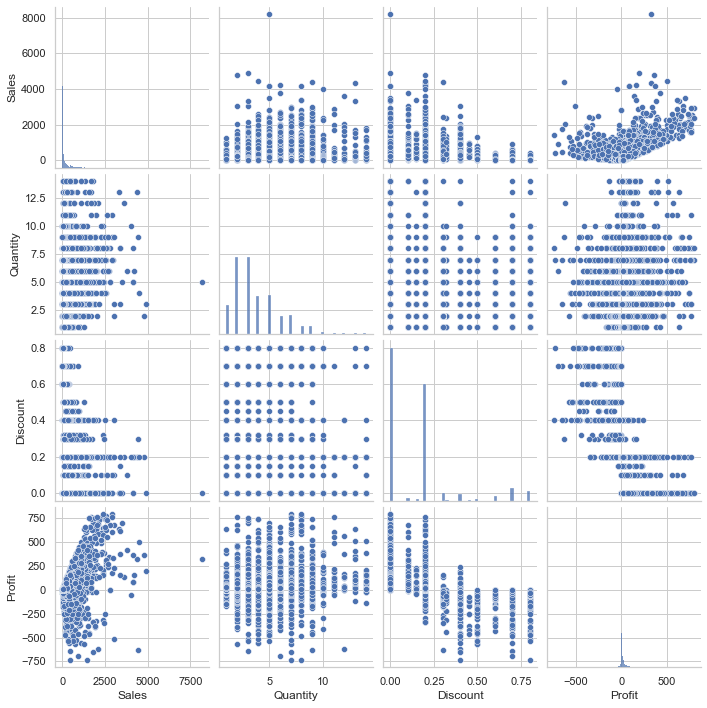

In [24]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

In [25]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197295.143
1,Los Angeles,164453.989
2,San Francisco,109869.132
3,Seattle,96330.948
4,Philadelphia,91788.401


In [26]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39957.8971
1,Los Angeles,26553.7452
2,Seattle,18951.2609
3,San Francisco,16562.3989
4,Detroit,8235.4208


In [27]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.70
1,Houston,139.94
2,Chicago,118.70
3,Dallas,55.50
4,Los Angeles,54.70


In [28]:
#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [29]:
#Cities with lowest Average sales
avg_sales.tail()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [30]:
#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [31]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Missouri City,0.8
1,Romeoville,0.8
2,Deer Park,0.8
3,Abilene,0.8
4,Elyria,0.7


In [32]:
#Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Bozeman,0.0
527,Mobile,0.0
528,Montebello,0.0
529,Montgomery,0.0
530,Aberdeen,0.0


## Feature Engineering

In [33]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

In [34]:
#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]

In [35]:
#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

In [36]:
#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

In [37]:
#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

In [38]:
#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

In [39]:
#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Missouri City,0.8,6.370
1,Romeoville,0.8,8.952
2,Deer Park,0.8,6.924
3,Abilene,0.8,1.392
4,Elyria,0.7,1.824
5,Ormond Beach,0.7,2.808
6,Pensacola,0.7,2.214


In [40]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


In [41]:
#Cities where Average Discount is less but Average Sales is High
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Saint Peters,0.0,697.160000
2,Morristown,0.0,539.853333
3,Harrisonburg,0.0,626.958571
4,Independence,0.0,1208.685000
5,Dubuque,0.0,562.433333
6,Noblesville,0.0,772.795000
7,Norman,0.0,675.665000
8,Beverly,0.0,861.063333
9,Madison,0.0,534.679000


In [42]:
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


In [43]:
#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Missouri City,0.8,-9.5550
1,Romeoville,0.8,-14.7708
2,Deer Park,0.8,-10.3860
3,Abilene,0.8,-3.7584
4,Elyria,0.7,-1.3984
5,Littleton,0.7,-98.8018
6,Ormond Beach,0.7,-1.9656
7,Pensacola,0.7,-1.4760


In [44]:
#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Vacaville,0.0,110.052800
1,Appleton,0.0,277.383150
2,Saint Cloud,0.0,156.538000
3,Saint Peters,0.0,146.403600
4,Washington,0.0,105.958930
5,Morristown,0.0,165.842750
6,Harrisonburg,0.0,127.074843
7,Independence,0.0,487.831500
8,Indianapolis,0.0,119.202339
9,Kenosha,0.0,114.230311


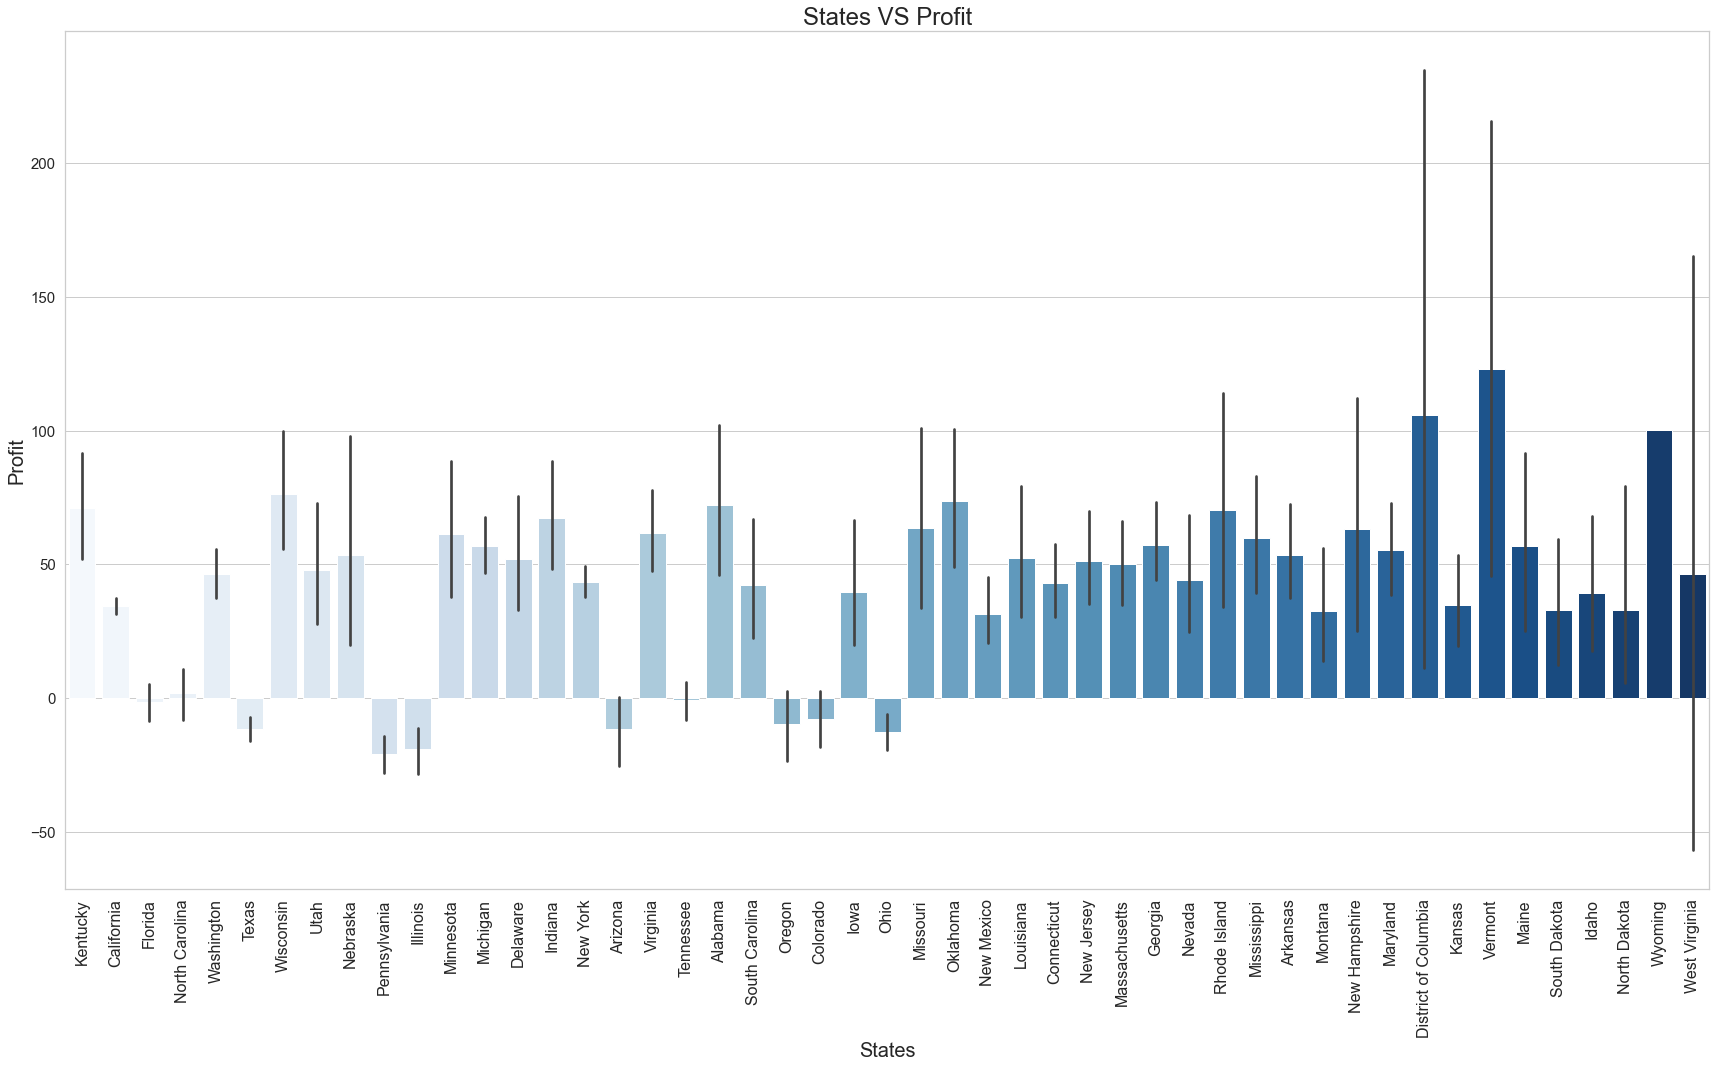

In [45]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Blues",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

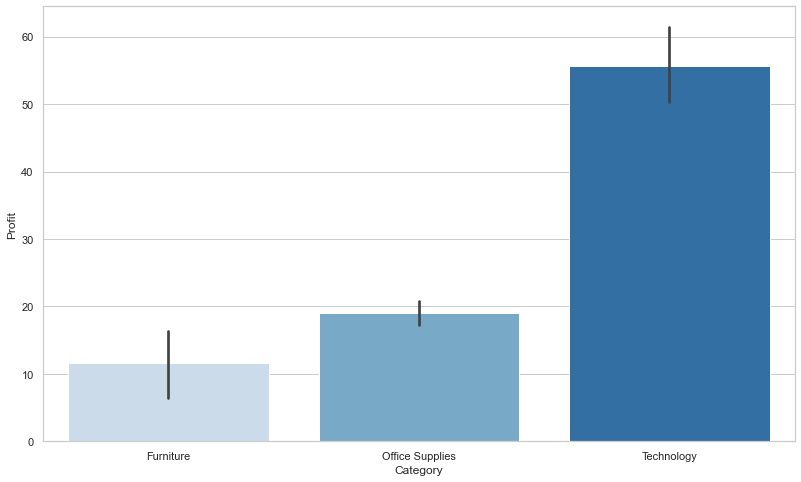

In [46]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Blues")

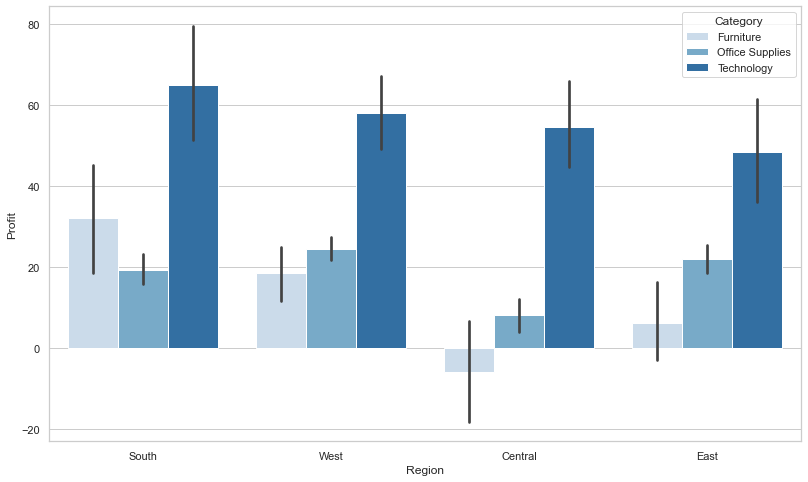

In [47]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Blues")

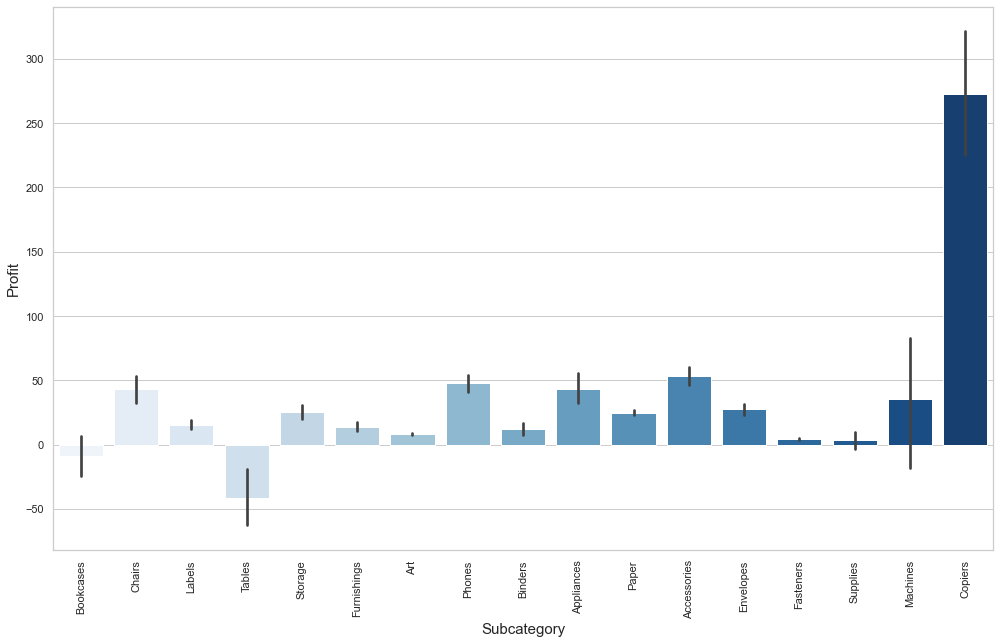

In [48]:
#Subcategory wise profit
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="Blues")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [49]:
#Entries with Category=Technology
ds_tech=ds[(ds['Category']=="Technology")]
ds_tech.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,2014-08-27,2014-09-01,Second Class,Zuschuss Donatelli,Consumer,San Francisco,California,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,2016-01-16,2016-01-20,Second Class,Eric Hoffmann,Consumer,Los Angeles,California,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,2016-12-08,2016-12-10,First Class,Gene Hale,Corporate,Richardson,Texas,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


Text(0, 0.5, 'Sales')

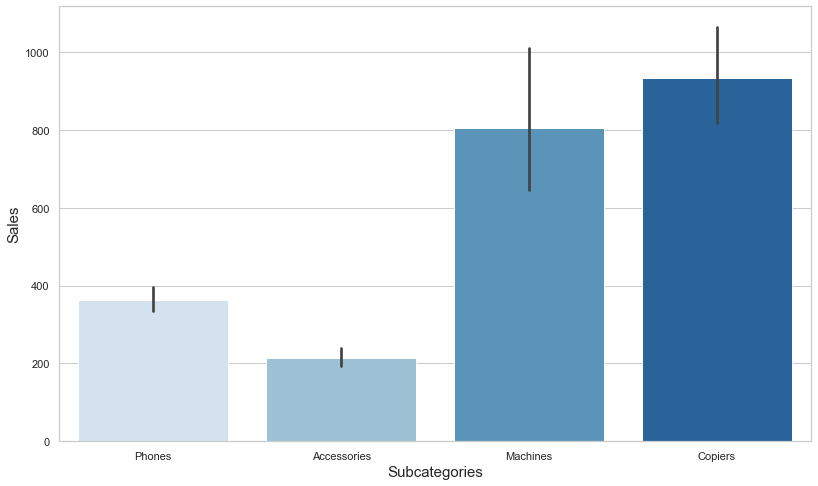

In [50]:
#Let's get the Sales of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

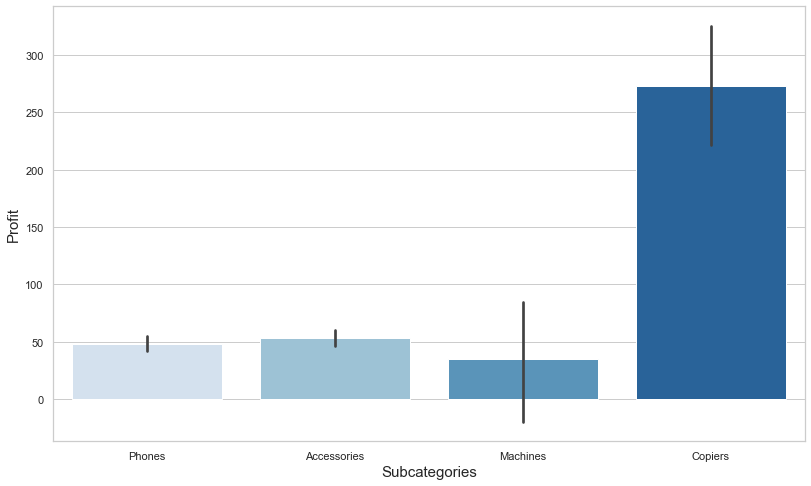

In [51]:
#Let's get the Profit of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

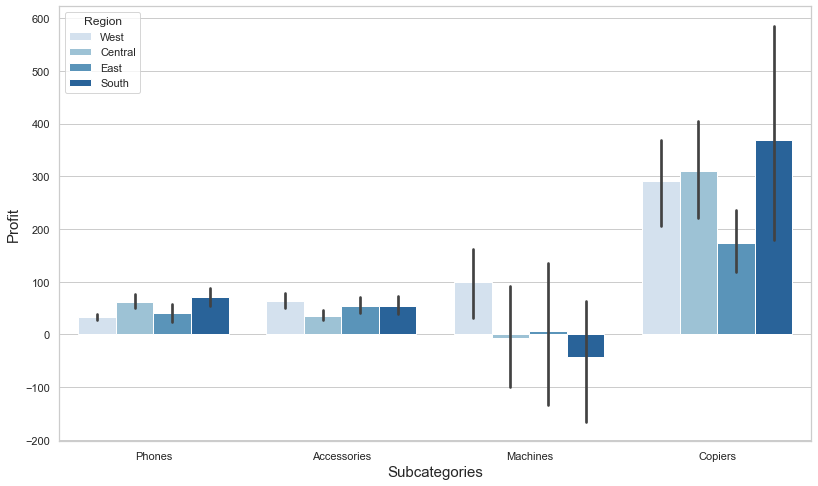

In [52]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

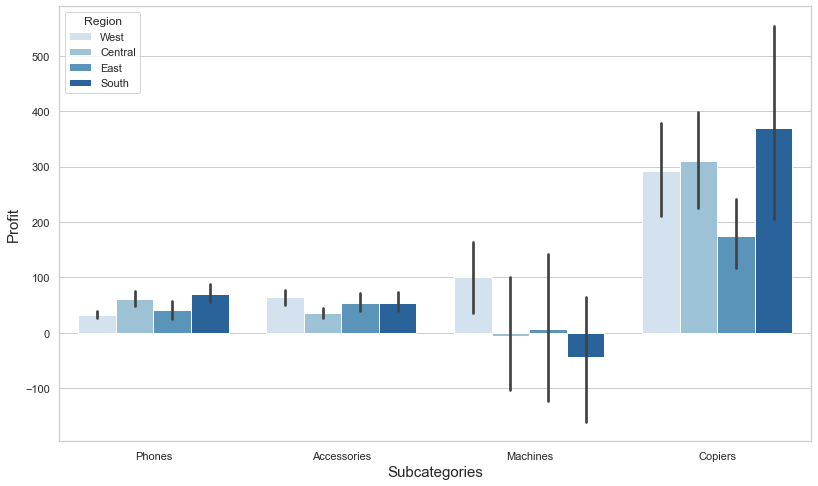

In [53]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

## Time Series Analysis

#### Technology Sales

In [54]:
df = pd.read_excel("/Users/stevenmacauda/Downloads/Sample - Superstore.xls")

technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [55]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [56]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [57]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [58]:
y = technology['Sales'].resample('MS').mean()

In [59]:
y['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

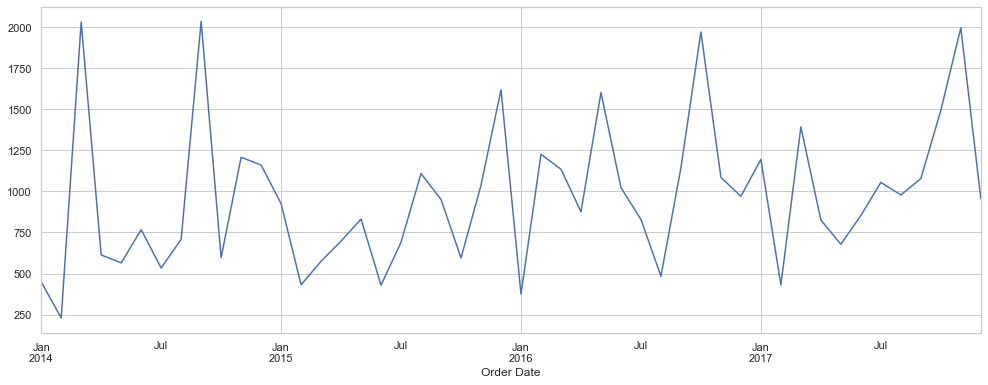

In [60]:
y.plot(figsize=(15, 6))
plt.show()

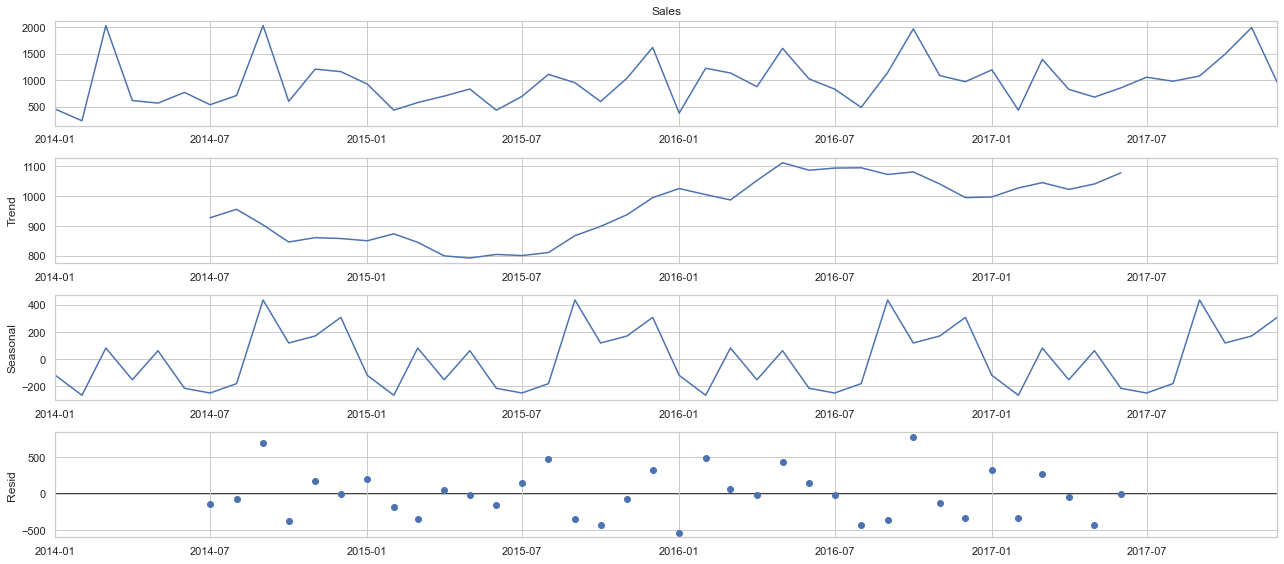

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Furniture Sales

In [62]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [63]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [64]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [65]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [66]:
y2 = furniture['Sales'].resample('MS').mean()

In [67]:
y2['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

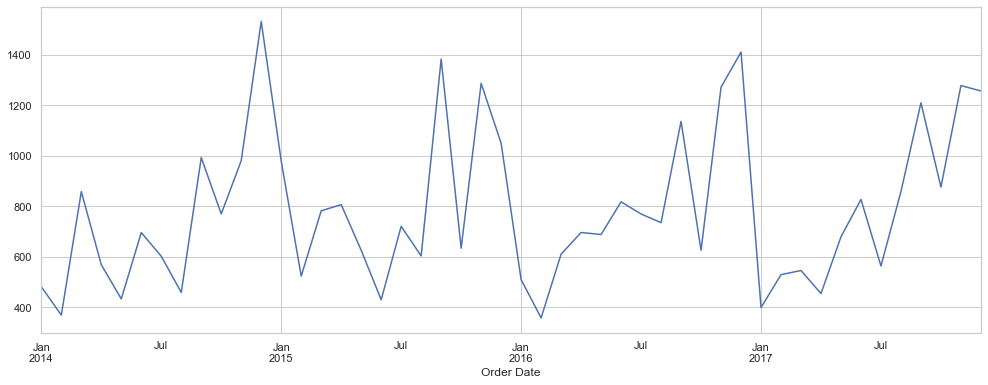

In [68]:
y2.plot(figsize=(15, 6))
plt.show()

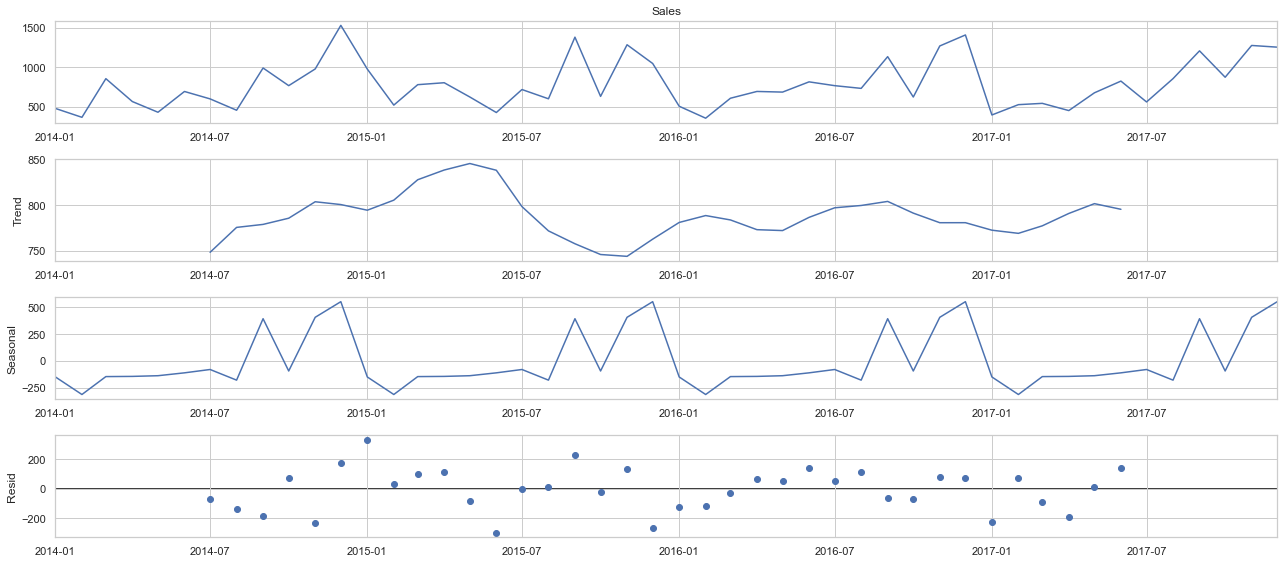

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decomposition.plot()
plt.show()

### ARIMA Model

In [70]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']

In [71]:
technology.shape, office.shape, furniture.shape

((1847, 21), (6026, 21), (2121, 21))

In [72]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture.drop(cols, axis=1, inplace=True)

technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.sort_values('Order Date')

technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [73]:
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
furniture = furniture.set_index('Order Date')

y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_furniture = furniture['Sales'].resample('MS').mean()

technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales':y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

store = technology.merge(office, how='inner', on='Order Date')
store = store.merge(furniture, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales', 'Sales': 'furniture_sales'}, inplace=True)
store.head()

,Order Date,technology_sales,office_sales,furniture_sales
0,2014-01-01,449.041429,285.357647,480.194231
1,2014-02-01,229.787143,63.042588,367.931600
2,2014-03-01,2031.948375,391.176318,857.291529
3,2014-04-01,613.028933,464.794750,567.488357
4,2014-05-01,564.698588,324.346545,432.049188


#### Technology Sales

This analysis will use the [ARIMA](#ARIMA) model. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [74]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Now we will use grid search to determine optimal parameters. 

In [75]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_technology = sm.tsa.statespace.SARIMAX(y_technology, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results_technology = mod_technology.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22392D+00    |proj g|=  1.60799D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   3.027D-07   8.224D+00
  F =   8.2238455885520363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.0

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.205D-05   5.834D+00
  F =   5.8344078434355202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88974D+01    |proj g|=  1.51826D-03

At iterate    5    f=  2.27730D+01    |proj g|=  6.76210D+00
  ys=-2.858E+01  -gs= 7.117E-01 BFGS update SKIPPED
  ys=-2.217E+02  -gs= 7.268E-01 BFGS update SKIPPED

           * * *

Tit   = t


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.68339D+00    |proj g|=  1.36331D-02

At iterate   10    f=  3.68315D+00    |proj g|=  4.92854D-04

At iterate   15    f=  3.68289D+00    |proj g|=  1.02002D-02

At iterate   20    f=  3.67059D+00    |proj g|=  4.25777D-02

At iterate   25    f=  3.66547D+00    |proj g|=  1.56788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     34      1     0     0   2.640D-05   3.665D+00
  F =   3.6654638059370535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57633D+00    |proj g|=  2.81193D-01

At iterate    5    f=  3.50428D+00    |proj g|=  4.48241D-04

At iterate   10    f=  3.50426D+00    |proj g|=  2.78328D-03

At iterate   15    f=  3.50232D+00    |proj g|=  3.57033D-02

At iterate   20    f=  3.49179D+00    |proj g|=  9.13660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.550D-06   3.492D+00
  F =   3.4915545413232381     

CONVERG

 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.83607D+00    |proj g|=  3.49736D-04

At iterate   10    f=  3.83600D+00    |proj g|=  6.39850D-03

At iterate   15    f=  3.83265D+00    |proj g|=  2.12959D-02

At iterate   20    f=  3.83204D+00    |proj g|=  1.33564D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   1.336D-06   3.832D+00
  F =   3.8320417352798750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.133E+01  -gs= 6.826E-01 BFGS update SKIPPED
  ys=-3.804E+01  -gs= 6.956E-01 BFGS update SKIPPED
  ys=-2.007E+01  -gs= 7.081E-01 BFGS update SKIPPED

At iterate    5    f=  1.54385D+01    |proj g|=  2.52357D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     69      3     3     0   2.524D+03   1.544D+01
  F =   15.438496810723839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86456D+00   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76060D+01    |proj g|=  9.64364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     57      2     0     0   7.654D+05   1.835D+01
  F =   18.348056149487807     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.36486D+00    |proj g|=  7.57301D-02

At iterate   20    f=  3.32929D+00    |proj g|=  1.00141D-01

At iterate   25    f=  3.32437D+00    |proj g|=  1.15364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   4.635D-07   3.324D+00
  F =   3.3243697558824148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44381D+00    |proj g|=  1.11004D-01

At iter

 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70597D+00    |proj g|=  3.34828D-02

At iterate    5    f=  3.70531D+00    |proj g|=  2.65714D-04

At iterate   10    f=  3.70521D+00    |proj g|=  1.43773D-02

At iterate   15    f=  3.69495D+00    |proj g|=  1.19551D-01

At iterate   20    f=  3.68253D+00    |proj g|=  1.03679D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   1.397D-06   3.683D+00
  F =   3.6825321278691772     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68776D+00    |proj g|=  1.44424D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.444D-05   7.688D+00
  F =   7.6877607826513978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.9

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91057D+00    |proj g|=  6.80452D-01

At iterate    5    f=  5.62195D+00    |proj g|=  1.31049D-01

At iterate   10    f=  5.61679D+00    |proj g|=  5.40411D-04

At iterate   15    f=  5.61666D+00    |proj g|=  1.34166D-02

At iterate   20    f=  5.60643D+00    |proj g|=  1.09814D-01

At iterate   25    f=  5.59665D+00    |proj g|=  7.30744D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86890D+01    |proj g|=  3.39810D-02
  ys=-2.130E+07  -gs= 1.595E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     53      2     1     0   2.417D+06   7.409D+00
  F =   7.4090694919825699     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables a

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.49799D+00    |proj g|=  3.17090D-03

At iterate   15    f=  3.49753D+00    |proj g|=  2.48983D-04

At iterate   20    f=  3.49751D+00    |proj g|=  2.07171D-03

At iterate   25    f=  3.49616D+00    |proj g|=  2.36409D-02

At iterate   30    f=  3.48806D+00    |proj g|=  3.03723D-02

At iterate   35    f=  3.47731D+00    |proj g|=  4.77421D-02

At iterate   40    f=  3.47642D+00    |proj g|=  2.84037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     57      1     0     0   8.042D-07   3.476D+00
  F =   3.4764171193424702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.79985D+01    |proj g|=  1.45301D-01
  ys=-4.287E-10  -gs= 9.930E-10 BFGS update SKIPPED

At iterate   10    f=  2.79984D+01    |proj g|=  1.52807D+00
  ys=-3.986E-02  -gs= 9.727E-03 BFGS update SKIPPED

At iterate   15    f=  2.79978D+01    |proj g|=  2.21260D+01
  ys=-3.255E-03  -gs= 6.240E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16    110      2     3     0   2.213D+01   2.800D+01
  F =   27.997795991752252     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.68273D+00    |proj g|=  3.11266D-03

At iterate   10    f=  3.68271D+00    |proj g|=  7.19712D-04

At iterate   15    f=  3.68191D+00    |proj g|=  8.08600D-03

At iterate   20    f=  3.68037D+00    |proj g|=  1.71712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   1.584D-06   3.680D+00
  F =   3.6803638103905736     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.530D-06   5.744D+00
  F =   5.7443560112506944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70054D+00    |proj g|=  2.28161D-01

At iterate    5    f=  3.63836D+00    |proj g|=  2.07595D-04

At iterate   10    f=  3.63828D+00    |proj g|=  6.29258D-03

At iterate   15    f=  3.63030D+00    |proj g|=  6.46444D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     87      2     2     0   8.675D+04   1.510D+01
  F =   15.104552348499110     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64934D+00    |proj g|=  8.62335D-03

At iterate    5    f=  3.64926D+00    |proj g|=  5.74693D-04

At iterate   10    f=  3.64915D+00    |proj g|=  9.53572D-03

At iterate   15    f=  3.64112D+00    |proj g|=  6.31313D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.61700D+00    |proj g|=  4.68053D-02

At iterate   25    f=  3.61382D+00    |proj g|=  4.21936D-03

At iterate   30    f=  3.61302D+00    |proj g|=  4.20159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     38      1     0     0   1.994D-06   3.613D+00
  F =   3.6130214808247483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03678D+00    |proj g|=  2.19060D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     50      2     1     0   1.198D+06   1.582D+01
  F =   15.823462192848595     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36330D+00    |proj g|=  1.11138D-01

At iterate    5    f=  5.35423D+00    |proj g|=  2.73660D-04

At iterate   10    f=  5.35422D+00    |proj g|=  3.12827D-03

At iterate   15    f=  5.35386D+00    |proj g|=  3.36001D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  5.27539D+00    |proj g|=  3.82096D-04

At iterate   10    f=  5.27525D+00    |proj g|=  8.30951D-03

At iterate   15    f=  5.26605D+00    |proj g|=  5.18555D-02

At iterate   20    f=  5.26173D+00    |proj g|=  4.24126D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   6.626D-06   5.262D+00
  F =   5.2617259332541222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     62      2     0     0   8.510D+04   2.693D+01
  F =   26.929771987710080     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53607D+00    |proj g|=  6.77473D-02

At iterate    5    f=  3.52753D+00    |proj g|=  2.97533D-04

At iterate   10    f=  3.52740D+00    |proj g|=  9.46544D-03

At iterate   15    f=  3.51459D+00    |proj g|=  1.07223D-01

At iter

In [76]:
mod_technology = sm.tsa.statespace.SARIMAX(y_technology,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_technology = mod_technology.fit()

print(results_technology.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66664D+00    |proj g|=  8.67247D-02

At iterate    5    f=  5.65409D+00    |proj g|=  1.06266D-03

At iterate   10    f=  5.65408D+00    |proj g|=  5.48101D-03

At iterate   15    f=  5.65216D+00    |proj g|=  7.76804D-02

At iterate   20    f=  5.61887D+00    |proj g|=  1.09751D-01

At iterate   25    f=  5.61137D+00    |proj g|=  1.80362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     31      1     0     0   

 This problem is unconstrained.


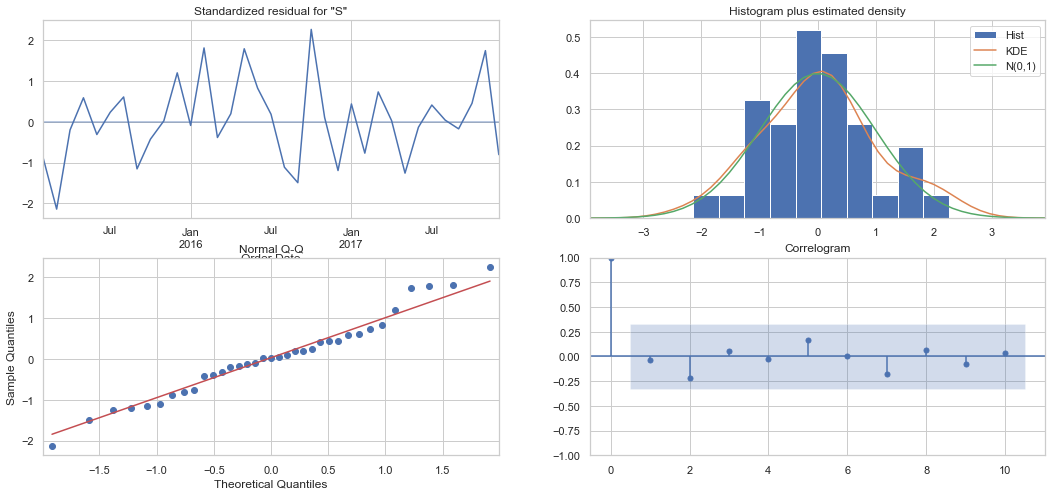

In [77]:
results_technology.plot_diagnostics(figsize=(16, 8))
plt.show()

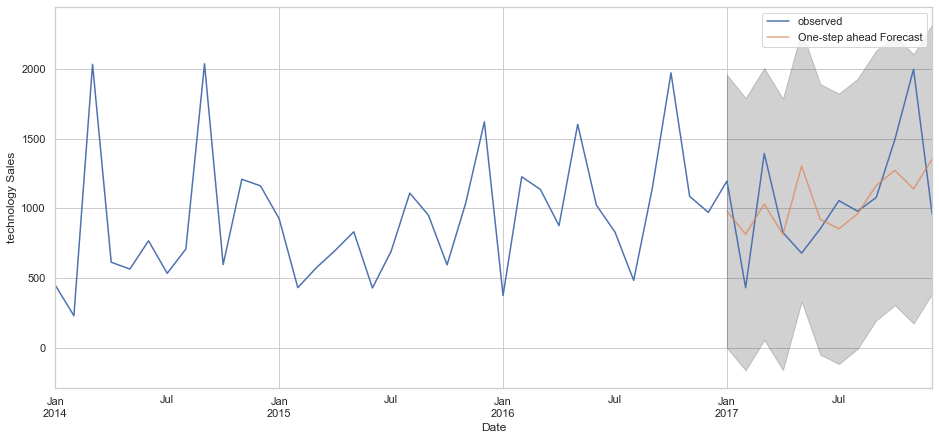

In [78]:
pred_technology = results_technology.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_technology = pred_technology.conf_int()

ax = y_technology['2014':].plot(label='observed')
pred_technology.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_technology.index,
                pred_ci_technology.iloc[:, 0],
                pred_ci_technology.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')
plt.legend()

plt.show()

In [80]:
y_forecasted_technology = pred_technology.predicted_mean
y_truth_technology = y_technology['2017-01-01':]

# Compute the mean square error
mse_technology = ((y_forecasted_technology - y_truth_technology) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_technology, 2)))

The Mean Squared Error of our forecasts is 142623.98


In [81]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_technology), 2)))

The Root Mean Squared Error of our forecasts is 377.66


In [110]:
from sklearn.metrics import r2_score
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_technology, y_truth_technology)))

The R-squared of our forecasts is -3.2096306023025765


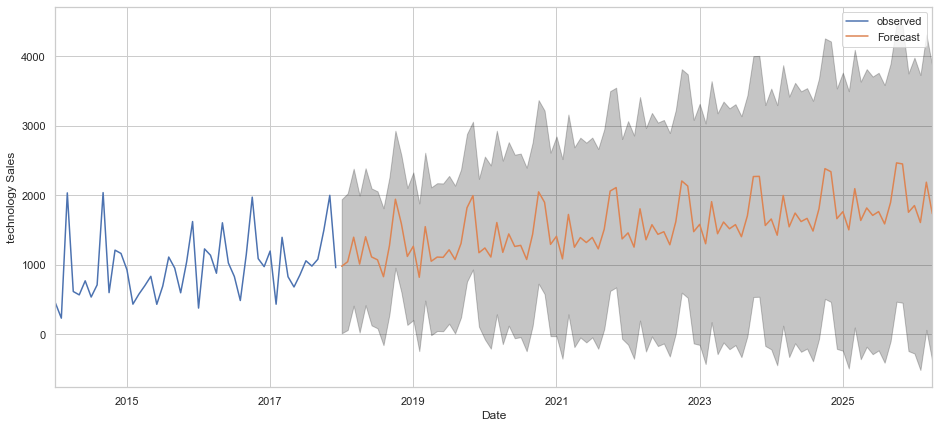

In [84]:
pred_uc_technology = results_technology.get_forecast(steps=100)
pred_ci_technology = pred_uc_technology.conf_int()

ax = y_technology.plot(label='observed', figsize=(14, 7))
pred_uc_technology.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_technology.index,
                pred_ci_technology.iloc[:, 0],
                pred_ci_technology.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')

plt.legend()
plt.show()

#### Furniture Sales

In [85]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [86]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_furniture = sm.tsa.statespace.SARIMAX(y_furniture,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results_furniture = mod_furniture.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15333D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   8.153D+00
  F =   8.1533264604570608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.9

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65332D+01    |proj g|=  1.01820D-01

At iterate    5    f=  2.02219D+01    |proj g|=  3.24796D+05

At iterate   10    f=  1.86939D+01    |proj g|=  8.47697D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     68      1     0     0   8.477D+04   1.869D+01
  F =   18.693893564392216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.06764D+00    |proj g|=  1.64783D-02

At iterate   15    f=  5.06068D+00    |proj g|=  1.79159D-03

At iterate   20    f=  5.06052D+00    |proj g|=  9.22121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   1.374D-05   5.061D+00
  F =   5.0605162817648877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94463D+00    |proj g|=  2.71719D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11    107      2     3     0   9.058D+04   2.093D+01
  F =   20.925817162142568     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13750D+00    |proj g|=  2.96550D-02

At iterate    5    f=  5.13701D+00    |proj g|=  9.86059D-04

At iterate   10    f=  5.13686D+00    |proj g|=  1.51372D-02

At iterate   15    f=  5.13588D+00    |proj g|=  6.98099D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     44      1     0     0   3.594D-06   7.121D+00
  F =   7.1214300923652898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83530D+01    |proj g|=  1.01820D-01

At iterate    5    f=  3.81557D+01    |proj g|=  1.17672D-03

At iterate   10    f=  3.81224D+01    |proj g|=  2.12694D-01
  ys=-9.305E+01  -gs= 9.739E-01 BFGS update SKIPPED
  ys=-1.409E+02  -

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16    111      2     2     0   1.190D+05   1.856D+01
  F =   18.560404953307543     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08100D+00    |proj g|=  2.71652D-02

At iterate    5    f=  5.08008D+00    |proj g|=  7.92781D-04

At iterate   10    f=  5.07961D+00    |proj g|=  2.19737D-02

At iterate   15    f=  5.07501D+00    |proj g|=  4.10743D-03

       

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.15755D+00    |proj g|=  4.20220D-03

At iterate   10    f=  5.15338D+00    |proj g|=  3.97760D-02

At iterate   15    f=  5.14814D+00    |proj g|=  7.59092D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     21      1     0     0   8.340D-07   5.148D+00
  F =   5.1481373289043466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96802D+00    |proj g|=  2.72179D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  2.25299D+01    |proj g|=  1.76049D+04
  ys=-3.114E+01  -gs= 9.501E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     90      3     3     0   1.760D+04   2.253D+01
  F =   22.529917193249656     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21020D+00    |proj g|=  1.04011D-01

At iterate    5    f=  5.19951D+00    |proj g|=  4.65957D-03

At iterate   10  

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.03908D+00    |proj g|=  3.43025D-04

At iterate   10    f=  7.03883D+00    |proj g|=  5.84629D-03

At iterate   15    f=  7.03492D+00    |proj g|=  2.31484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     24      1     0     0   2.858D-06   7.035D+00
  F =   7.0349117265651344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72292D+01    |proj g|=  6.47884D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11    132      3     3     0   4.215D+05   1.603D+01
  F =   16.033450357268990     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07796D+00    |proj g|=  8.60975D-02

At iterate    5    f=  5.06507D+00    |proj g|=  4.56653D-04

At iterate   10    f=  5.06474D+00    |proj g|=  1.44089D-02

At iterate   15    f=  5.05879D+00    |proj g|=  9.28360D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.80402D+00    |proj g|=  6.88233D-02

At iterate   15    f=  6.77626D+00    |proj g|=  8.03011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     36      1     0     0   4.142D-06   6.776D+00
  F =   6.7762235340242922     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76174D+01    |proj g|=  1.10035D-01

At iterate    5    f=  3.75644D+01    |proj g|=  2.90584D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  2.09655D+01    |proj g|=  3.77912D+05
  ys=-1.358E+02  -gs= 9.653E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16    109      3     3     0   3.779D+05   2.097D+01
  F =   20.965477594066574     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03740D+00    |proj g|=  9.04964D-02

At iterate    5    f=  5.01839D+00    |proj g|=  9.15972D-04

At iterate   10  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.01433D+00    |proj g|=  2.18864D-03

At iterate   15    f=  5.01308D+00    |proj g|=  3.30191D-02

At iterate   20    f=  4.98556D+00    |proj g|=  1.10737D-01

At iterate   25    f=  4.96696D+00    |proj g|=  1.46946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     30      1     0     0   3.054D-06   4.967D+00
  F =   4.9669573181312199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     96      2     2     0   1.881D+05   2.018D+01
  F =   20.178192119308736     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13790D+00    |proj g|=  2.32707D-02

At iterate    5    f=  5.13750D+00    |proj g|=  4.13837D-03

At iterate   10    f=  5.13585D+00    |proj g|=  2.75494D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14    100      2     3     0   1.121D+05   1.892D+01
  F =   18.917457393582779     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07940D+00    |proj g|=  3.00782D-02

At iterate    5    f=  5.07808D+00    |proj g|=  8.94826D-04

At iterate   10    f=  5.07756D+00    |proj g|=  1.67178D-02

At iterate   15    f=  5.07488D+00    |proj g|=  1.52826D-03

       

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-4.298E+01  -gs= 9.800E-01 BFGS update SKIPPED
  ys=-3.152E+01  -gs= 9.687E-01 BFGS update SKIPPED

At iterate    5    f=  2.25885D+01    |proj g|=  7.45810D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    125      3     2     0   5.986D+04   2.165D+01
  F =   21.654583895782498     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14160D+00    |proj g|=  5.71167D-02

At iterate    5    f=  5.14057D+00    |proj g|=  9.23750D-03

At iterate   10    f=  5.13653D+00    |proj g|=  4.24407D-02

At iterate   15    f=  5.13515D+00    |proj g|=  2.92529D-04

At iter

 This problem is unconstrained.



At iterate   25    f=  5.06114D+00    |proj g|=  1.32533D-02

At iterate   30    f=  5.06053D+00    |proj g|=  4.64723D-03

At iterate   35    f=  5.05988D+00    |proj g|=  1.01957D-02

At iterate   40    f=  5.05914D+00    |proj g|=  1.78415D-02

At iterate   45    f=  5.05790D+00    |proj g|=  6.97439D-04

At iterate   50    f=  5.05789D+00    |proj g|=  2.23732D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     66      1     0     0   2.237D-06   5.058D+00
  F =   5.0578902452607695     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.04541D+00    |proj g|=  1.59930D-03

At iterate   25    f=  7.04210D+00    |proj g|=  9.67089D-02

At iterate   30    f=  6.98496D+00    |proj g|=  5.13390D-01

At iterate   35    f=  6.93061D+00    |proj g|=  5.67100D-02

At iterate   40    f=  6.93022D+00    |proj g|=  4.77543D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     59      1     0     0   4.775D-04   6.930D+00
  F =   6.9302158839474295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16    119      2     3     0   1.680D+05   1.861D+01
  F =   18.607571397781843     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08276D+00    |proj g|=  5.69070D-02

At iterate    5    f=  5.08026D+00    |proj g|=  4.93145D-04

At iterate   10    f=  5.07975D+00    |proj g|=  1.68357D-02

At iterate   15    f=  5.07734D+00    |proj g|=  1.04880D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.07272D+00    |proj g|=  1.59830D-02

At iterate   10    f=  5.07239D+00    |proj g|=  8.06335D-03

At iterate   15    f=  5.07010D+00    |proj g|=  5.15723D-03

At iterate   20    f=  5.07000D+00    |proj g|=  1.12076D-03

At iterate   25    f=  5.06885D+00    |proj g|=  9.07483D-03

At iterate   30    f=  5.05938D+00    |proj g|=  1.84712D-02

At iterate   35    f=  5.05576D+00    |proj g|=  3.60904D-03

At iterate   40    f=  5.05548D+00    |proj g|=  1.30718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     55      1     0     0   2.542D-06   5.055D+00
  F =   5.05545734776

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     86      4     3     0   2.373D+05   1.780D+01
  F =   17.799544407030321     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10745D+00    |proj g|=  5.90573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76291D+01    |proj g|=  1.10040D-01

At iterate    5    f=  3.75716D+01    |proj g|=  2.96053D-02
  ys=-1.441E+02  -gs= 9.748E-01 BFGS update SKIPPED

At iterate   10    f=  2.26605D+01    |proj g|=  1.55455D+04
  ys=-2.326E+01  -gs= 9.057E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     96      2     2     0   4.147D+05   1.678D+01
  F =   16.776014916283717     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07065D+00    |proj g|=  6.36916D-02

At iterate    5    f=  5.06580D+00    |proj g|=  1.38341D-03

At iterate   10    f=  5.06477D+00    |proj g|=  2.33477D-02

At iterate   15    f=  5.06099D+00    |proj g|=  1.30586D-03

       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05024D+00    |proj g|=  8.52365D-02

At iterate    5    f=  7.01969D+00    |proj g|=  8.12547D-02

At iterate   10    f=  7.01480D+00    |proj g|=  5.50545D-04

At iterate   15    f=  7.01470D+00    |proj g|=  1.39017D-02

At iterate   20    f=  7.00652D+00    |proj g|=  2.80145D-02

At iterate   25    f=  7.00431D+00    |proj g|=  1.76118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     35      1     0     0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09331D+00    |proj g|=  2.33947D-01

At iterate    5    f=  5.01261D+00    |proj g|=  3.71120D-02

At iterate   10    f=  5.00873D+00    |proj g|=  9.79365D-04

At iterate   15    f=  5.00848D+00    |proj g|=  1.97599D-02

At iterate   20    f=  4.97490D+00    |proj g|=  8.32390D-02

At iterate   25    f=  4.96474D+00    |proj g|=  1.01136D-02

At iterate   30    f=  4.96452D+00    |proj g|=  2.43239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.89149D+00    |proj g|=  2.04355D-02

At iterate   10    f=  6.89071D+00    |proj g|=  4.02458D-03

At iterate   15    f=  6.87719D+00    |proj g|=  6.57988D-02

At iterate   20    f=  6.78348D+00    |proj g|=  1.21750D-01

At iterate   25    f=  6.75567D+00    |proj g|=  3.18859D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     42      1     0     0   1.205D-06   6.756D+00
  F =   6.7555667174982803     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13    103      2     4     0   1.062D+05   2.020D+01
  F =   20.202133404050240     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04808D+00    |proj g|=  8.88357D-02

At iterate    5    f=  5.01487D+00    |proj g|=  2.85906D-02

At iterate   10    f=  5.01305D+00    |proj g|=  8.83301D-04

At iterate   15    f=  5.01275D+00    |proj g|=  1.18778D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.01345D+00    |proj g|=  6.35790D-02

At iterate   10    f=  5.00824D+00    |proj g|=  2.96564D-03

At iterate   15    f=  5.00814D+00    |proj g|=  3.18524D-03

At iterate   20    f=  5.00509D+00    |proj g|=  4.18692D-02

At iterate   25    f=  4.96998D+00    |proj g|=  4.48099D-02

At iterate   30    f=  4.96445D+00    |proj g|=  3.97944D-03

At iterate   35    f=  4.96440D+00    |proj g|=  3.04832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     40      1     0     0   3.048D-06   4.964D+00
  F =   4.9643973998929765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [87]:
mod_furniture = sm.tsa.statespace.SARIMAX(y2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_furniture = mod_furniture.fit()

print(results_furniture.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04808D+00    |proj g|=  8.88357D-02

At iterate    5    f=  5.01487D+00    |proj g|=  2.85906D-02

At iterate   10    f=  5.01305D+00    |proj g|=  8.83301D-04

At iterate   15    f=  5.01275D+00    |proj g|=  1.18778D-02

At iterate   20    f=  4.99531D+00    |proj g|=  9.50055D-02

At iterate   25    f=  4.98503D+00    |proj g|=  1.23488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   

 This problem is unconstrained.


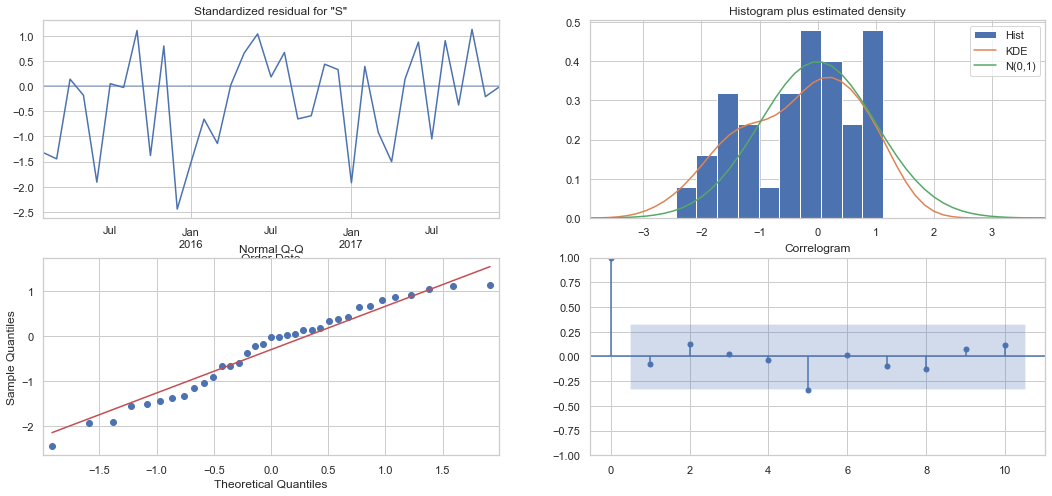

In [88]:
results_furniture.plot_diagnostics(figsize=(16, 8))
plt.show()

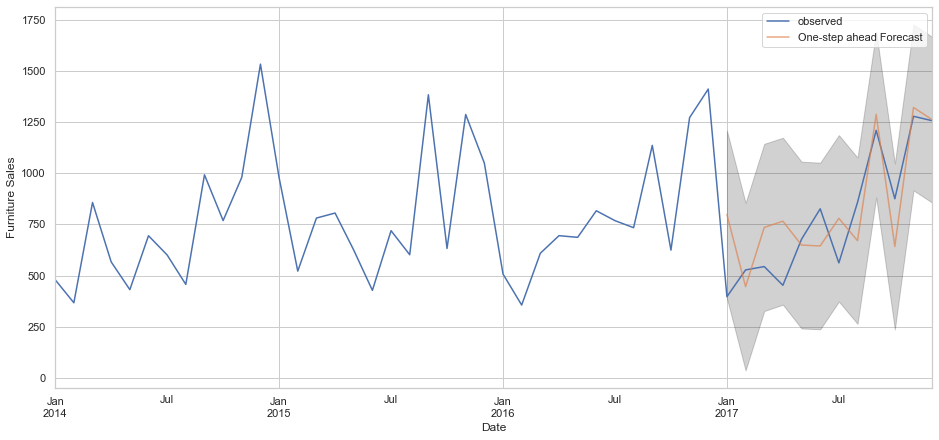

In [89]:
pred_furniture = results_furniture.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred_furniture.conf_int()

ax = y_furniture['2014':].plot(label='observed')
pred_furniture.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [91]:
y_forecasted_furniture = pred_furniture.predicted_mean
y_truth_furniture = y_furniture['2017-01-01':]

# Compute the mean square error
mse_furniture = ((y_forecasted_furniture - y_truth_furniture) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_furniture, 2)))

The Mean Squared Error of our forecasts is 39996.01


In [93]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_furniture), 2)))

The Root Mean Squared Error of our forecasts is 199.99


In [107]:
from sklearn.metrics import r2_score
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_furniture, y_truth_furniture)))

The R-squared of our forecasts is 0.48202931121827963


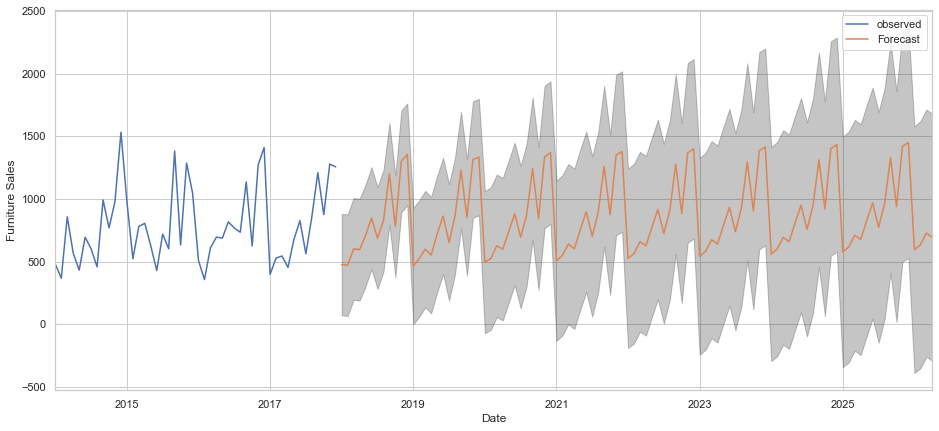

In [96]:
pred_uc_furniture = results_furniture.get_forecast(steps=100)
pred_ci_furniture = pred_uc_furniture.conf_int()

ax = y_furniture.plot(label='observed', figsize=(14, 7))
pred_uc_furniture.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_furniture.index,
                pred_ci_furniture.iloc[:, 0],
                pred_ci_furniture.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

#### Office Supplies Sales

In [97]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [98]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_office = sm.tsa.statespace.SARIMAX(y_office,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results_office = mod_office.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91904D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   7.919D+00
  F =   7.9190431749162142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.1

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97383D+01    |proj g|=  3.37507D-02

At iterate    5    f=  3.46847D+01    |proj g|=  4.60378D-01
  ys=-1.211E+02  -gs= 7.365E-01 BFGS update SKIPPED
  ys=-8.441E+01  -gs= 9.865E-01 BFGS update SKIPPED
  ys=-5.299E+01  -gs= 9.818E-01 BFGS update SKIPPED
  ys=-2.280E+00  -gs= 9.996E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9    104      4     4     0   7.175D+03   2.167D+01
  F =   21.6682832

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate

  ys=-4.488E+01  -gs= 9.787E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     85      3     3     0   7.537D+03   2.595D+01
  F =   25.951400133349704     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32902D+00    |proj g|=  1.03601D-02

At iterate    5    f=  5.32895D+00    |proj g|=  1.88244D-03

At iterate   10    f=  5.32858D+00    |proj g|=  1.97102D-02

           * * *


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.358E+02  -gs= 9.956E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25    120      3     3     0   7.945D+04   2.305D+01
  F =   23.049747825993862     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29360D+00    |proj g|=  1.03039D-01

At iterate    5    f=  5.28659D+00    |proj g|=  5.46706D-04

At iterate   10    f=  5.28625D+00    |proj g|=  1.41003D-02

At iterate   15  

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   4.463D-06   5.376D+00
  F =   5.3757149092777006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37586D+00    |proj g|=  3.17754D-01

At iterate    5    f=  5.28838D+00    |proj g|=  5.62732D-04

At iterate   10    f=  5.28644D+00    |proj g|=  3.99290D-02

At iterate   15    f=  5.26075D+00    |proj g|=  1.15890D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.680E+01  -gs= 9.543E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14    122      3     3     0   1.256D+05   1.994D+01
  F =   19.936013217485559     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26221D+00    |proj g|=  4.65327D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.25494D+00    |proj g|=  2.56453D-04

At iterate   10    f=  5.25480D+00    |proj g|=  7.92222D-03

At iterate   15    f=  5.25202D+00    |proj g|=  5.48507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   6.994D-07   5.252D+00
  F =   5.2519520524633938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37586D+00    |proj g|=  3.17754D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  3.05052D+01    |proj g|=  1.59068D+01
  ys=-3.795E+01  -gs= 9.654E-01 BFGS update SKIPPED
  ys=-1.441E+02  -gs= 9.827E-01 BFGS update SKIPPED
  ys=-2.549E-02  -gs= 2.199E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9    106      2     3     0   3.490D+05   1.843D+01
  F =   18.429977525057748     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21522D+00   

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21522D+00    |proj g|=  2.15436D-01

At iterate    5    f=  5.15745D+00    |proj g|=  8.68595D-04

At iterate   10    f=  5.15720D+00    |proj g|=  1.27421D-02

At iterate   15    f=  5.13643D+00    |proj g|=  1.18047D-01

At iterate   20    f=  5.10536D+00    |proj g|=  3.58675D-03

At iterate   25    f=  5.10490D+00    |proj g|=  1.39542D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  3.78834D+01    |proj g|=  6.05567D-03

At iterate   10    f=  3.78102D+01    |proj g|=  3.69561D-02
  ys=-1.196E+02  -gs= 9.351E-01 BFGS update SKIPPED
  ys=-3.347E+01  -gs= 9.495E-01 BFGS update SKIPPED
  ys=-3.514E+01  -gs= 9.532E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  2.16512D+01    |proj g|=  1.05528D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17    144      3     3     0   8.498D+04   2.005D+01
  F =   20.050798122089819     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19089D+00    |proj g|=  7.74306D-02

At iterate    5    f=  5.15922D+00    |proj g|=  8.29667D-04

At iterate   10    f=  5.15682D+00    |proj g|=  2.77218D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.357E+02  -gs= 9.525E-01 BFGS update SKIPPED

At iterate    5    f=  3.20736D+01    |proj g|=  1.75201D+01
  ys=-3.309E+01  -gs= 9.715E-01 BFGS update SKIPPED
  ys=-4.568E+01  -gs= 9.996E-01 BFGS update SKIPPED

At iterate   10    f=  2.25011D+01    |proj g|=  4.22944D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     96      1     3     0   4.229D+04   2.250D+01
  F =   22.501100303989077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables ar


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.26853D+00    |proj g|=  8.06732D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   8.067D-07   5.269D+00
  F =   5.2685310684796409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20410D+00    |proj g|=  2.03950D-01

At iterate    5    f=  7.15737D+00    |proj g|=  4.06214D-03

At iterate   10    f=  7.15708D+00    |proj g|=  3.82655D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.26225D+00    |proj g|=  1.55566D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   6.285D-07   5.262D+00
  F =   5.2622546252069551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48782D+01    |proj g|=  9.14542D+01

At iterate    5    f=  7.34855D+00    |proj g|=  4.44748D-01

At iterate   10    f=  7.08234D+00    |proj g|=  8.91892D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.570E+01  -gs= 9.734E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     93      3     3     0   1.388D+04   2.620D+01
  F =   26.202697758993779     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31451D+00    |proj g|=  1.41284D-02

At iterate    5    f=  5.31441D+00    |proj g|=  1.39078D-02

At iterate   10    f=  5.31417D+00    |proj g|=  3.98001D-04

At iterate   15  

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.25694D+00    |proj g|=  1.28563D-03

At iterate   20    f=  5.25692D+00    |proj g|=  5.04191D-03

At iterate   25    f=  5.25465D+00    |proj g|=  2.08477D-02

At iterate   30    f=  5.24058D+00    |proj g|=  2.87090D-02

At iterate   35    f=  5.23503D+00    |proj g|=  1.48034D-01

At iterate   40    f=  5.23251D+00    |proj g|=  1.42817D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     52      1     0     0   7.745D-05   5.233D+00
  F =   5.2325138414914028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.00749D+00    |proj g|=  4.23054D-03

At iterate   30    f=  7.00520D+00    |proj g|=  2.74056D-02

At iterate   35    f=  6.99981D+00    |proj g|=  4.56454D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     45      1     0     0   8.628D-06   7.000D+00
  F =   6.9997217631087691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97101D+01    |proj g|=  3.37505D-02
  ys=-3.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   20    f=  5.26084D+00    |proj g|=  3.47691D-02

At iterate   25    f=  5.24804D+00    |proj g|=  3.04966D-02

At iterate   30    f=  5.24773D+00    |proj g|=  6.85585D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     34      1     0     0   1.398D-05   5.248D+00
  F =   5.2477269931936519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31451D+00    |proj g|=  2.22723D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  5.23797D+00    |proj g|=  2.19796D-02

At iterate   35    f=  5.23314D+00    |proj g|=  1.56182D-03

At iterate   40    f=  5.23277D+00    |proj g|=  1.03062D-02

At iterate   45    f=  5.23253D+00    |proj g|=  2.00551D-03

At iterate   50    f=  5.23246D+00    |proj g|=  2.84189D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   2.842D-03   5.232D+00
  F =   5.2324581671524335     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


  ys=-5.442E+01  -gs= 9.622E-01 BFGS update SKIPPED
  ys=-2.419E+01  -gs= 9.424E-01 BFGS update SKIPPED
  ys=-3.343E+01  -gs= 9.521E-01 BFGS update SKIPPED
  ys=-4.156E+01  -gs= 9.571E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     61      5     4     0   8.146D+03   2.358D+01
  F =   23.575405785746266     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26638D+00    |proj g|=

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.16762D+00    |proj g|=  1.96674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   4.842D-06   5.168D+00
  F =   5.1675979772925880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92760D+00    |proj g|=  5.36837D-02

At iterate    5    f=  6.92475D+00    |proj g|=  7.21862D-04

At iterate   10    f=  6.92437D+00    |proj g|=  1.26084D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89673D+00    |proj g|=  6.77513D-02

At iterate    5    f=  6.88684D+00    |proj g|=  1.59693D-02

At iterate   10    f=  6.88638D+00    |proj g|=  4.62939D-04

At iterate   15    f=  6.88629D+00    |proj g|=  1.08113D-02

At iterate   20    f=  6.88209D+00    |proj g|=  3.89531D-02

At iterate   25    f=  6.88124D+00    |proj g|=  6.09450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.343E+01  -gs= 9.397E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9    109      3     4     0   7.343D+04   2.235D+01
  F =   22.353900539695047     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22938D+00    |proj g|=  8.01124D-02

At iterate    5    f=  5.19822D+00    |proj g|=  1.41832D-02

At iterate   10    f=  5.19815D+00    |proj g|=  1.87380D-03

At iterate   15  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.71914D+01    |proj g|=  4.79992D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     98      2     0     0   2.984D+05   1.892D+01
  F =   18.919417005395275     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20382D+00    |proj g|=  7.67634D-02

At iterate    5    f=  5.15318D+00    |proj g|=  4.27781D-02

At iterate   10    f=  5.15139D+00    |proj g|=  8.34131D-04

At iterate   15    f=  5.15052D+00    |proj g|=  2.31627D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.15041D+00    |proj g|=  4.49247D-02

At iterate   10    f=  5.14839D+00    |proj g|=  1.41175D-03

At iterate   15    f=  5.14824D+00    |proj g|=  4.46884D-03

At iterate   20    f=  5.14099D+00    |proj g|=  8.78954D-02

At iterate   25    f=  5.10357D+00    |proj g|=  3.05543D-02

At iterate   30    f=  5.10039D+00    |proj g|=  4.23018D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   5.601D-06   5.100D+00
  F =   5.1003852934260081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [100]:
mod_office = sm.tsa.statespace.SARIMAX(y_office,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_office = mod_office.fit()

print(results_office.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20382D+00    |proj g|=  7.67634D-02

At iterate    5    f=  5.15318D+00    |proj g|=  4.27781D-02

At iterate   10    f=  5.15139D+00    |proj g|=  8.34131D-04

At iterate   15    f=  5.15052D+00    |proj g|=  2.31627D-02

At iterate   20    f=  5.12330D+00    |proj g|=  4.92352D-02

At iterate   25    f=  5.11244D+00    |proj g|=  9.59076D-03

At iterate   30    f=  5.11238D+00    |proj g|=  5.93552D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


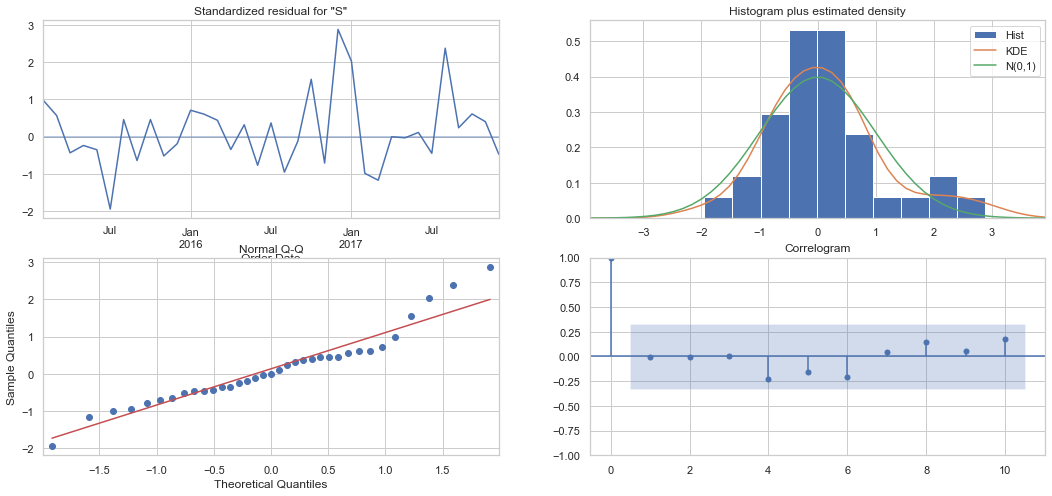

In [101]:
results_office.plot_diagnostics(figsize=(16, 8))
plt.show()

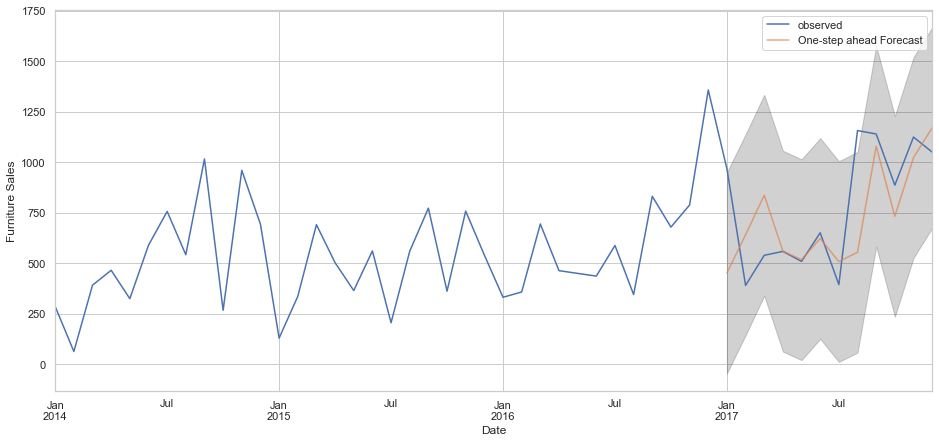

In [102]:
pred_office = results_office.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred_office.conf_int()

ax = y_office['2014':].plot(label='observed')
pred_office.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [103]:
y_forecasted_office = pred_office.predicted_mean
y_truth_office = y_office['2017-01-01':]

# Compute the mean square error
mse_office = ((y_forecasted_office - y_truth_office) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 142623.98


In [104]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_office), 2)))

The Root Mean Squared Error of our forecasts is 265.38


In [108]:
from sklearn.metrics import r2_score
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_office, y_truth_office)))

The R-squared of our forecasts is -0.2739673412449859


## Results

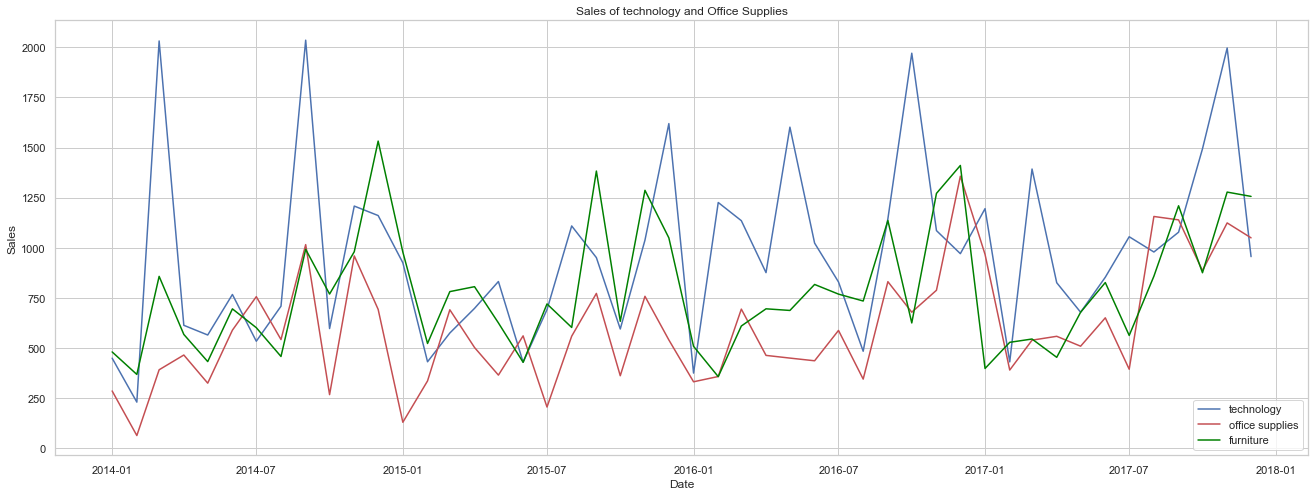

In [113]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.plot(store['Order Date'], store['furniture_sales'], 'r-', label = 'furniture', color='green')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of technology and Office Supplies')
plt.legend();

In [119]:
first_date_office = store.loc[np.min(list(np.where(store['office_sales'] > store['technology_sales'])[0])), 'Order Date']
first_date_furniture = store.loc[np.min(list(np.where(store['furniture_sales'] > store['technology_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than technology is {}.".format(first_date_office.date()))
print("Furniture first time produced higher sales than technology is {}.".format(first_date_furniture.date()))

Office supplies first time produced higher sales than technology is 2014-07-01.
Furniture first time produced higher sales than technology is 2014-01-01.


In [120]:
from prophet import Prophet

technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95)
technology_model.fit(technology)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -59.7409
Iteration  1. Log joint probability =    36.0894. Improved by 95.8303.
Iteration  2. Log joint probability =    50.2517. Improved by 14.1624.
Iteration  3. Log joint probability =    65.8778. Improved by 15.626.
Iteration  4. Log joint probability =    70.0617. Improved by 4.18397.
Iteration  5. Log joint probability =    70.6171. Improved by 0.555431.
Iteration  6. Log joint probability =    70.6503. Improved by 0.0331714.
Iteration  7. Log joint probability =    71.1781. Improved by 0.527814.
Iteration  8. Log joint probability =    71.2536. Improved by 0.0754692.
Iteration  9. Log joint probability =    71.2586. Improved by 0.00494821.
Iteration 10. Log joint probability =    71.2967. Improved by 0.0381678.
Iteration 11. Log joint probability =    71.3033. Improved by 0.00654426.
Iteration 12. Log joint probability =    71.3325. Improved by 0.0291994.
Iteration 13. Log joint probability =    71.3409. Improved by 0.00846069.
Iteration 14. Log

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -59.2582
Iteration  1. Log joint probability =    38.6371. Improved by 97.8953.
Iteration  2. Log joint probability =    65.5131. Improved by 26.876.
Iteration  3. Log joint probability =    79.6826. Improved by 14.1695.
Iteration  4. Log joint probability =    79.7921. Improved by 0.109445.
Iteration  5. Log joint probability =    79.8485. Improved by 0.0564444.
Iteration  6. Log joint probability =    79.9048. Improved by 0.0562415.
Iteration  7. Log joint probability =     79.915. Improved by 0.0102011.
Iteration  8. Log joint probability =    79.9719. Improved by 0.0569912.
Iteration  9. Log joint probability =    80.0012. Improved by 0.0292655.
Iteration 10. Log joint probability =    80.0279. Improved by 0.0266806.
Iteration 11. Log joint probability =    80.0448. Improved by 0.0169591.
Iteration 12. Log joint probability =    80.0537. Improved by 0.0088597.
Iteration 13. Log joint probability =    80.0611. Improved by 0.0073945.
Iteration 14. Log

oint probability =    80.0874. Improved by 6.35627e-07.
Iteration 29. Log joint probability =    80.0875. Improved by 7.74378e-05.
Iteration 30. Log joint probability =    80.0879. Improved by 0.000408844.
Iteration 31. Log joint probability =    80.0882. Improved by 0.000326871.
Iteration 32. Log joint probability =    80.0884. Improved by 0.000191256.
Iteration 33. Log joint probability =    80.0884. Improved by 4.66241e-05.
Iteration 34. Log joint probability =    80.0887. Improved by 0.000213995.
Iteration 35. Log joint probability =    80.0887. Improved by 8.15744e-05.
Iteration 36. Log joint probability =    80.0889. Improved by 0.00015383.
Iteration 37. Log joint probability =    80.0889. Improved by 6.02522e-05.
Iteration 38. Log joint probability =     80.089. Improved by 4.12535e-05.
Iteration 39. Log joint probability =     80.089. Improved by 1.52172e-05.
Iteration 40. Log joint probability =    80.0891. Improved by 4.85992e-05.
Iteration 41. Log joint probability =    80.0

In [121]:
technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

<Figure size 1296x432 with 0 Axes>

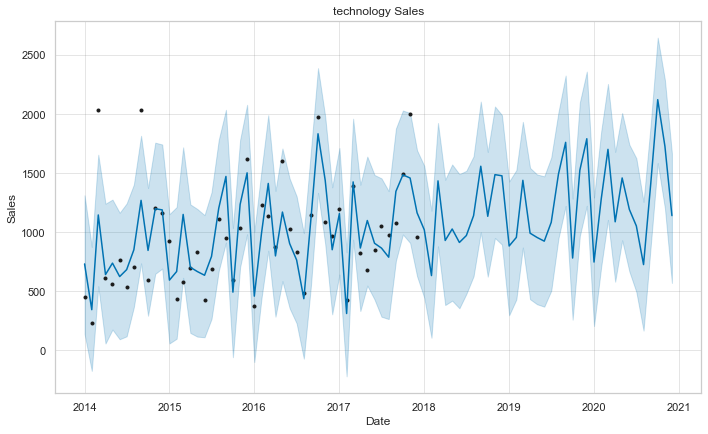

In [122]:
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('technology Sales');

<Figure size 1296x432 with 0 Axes>

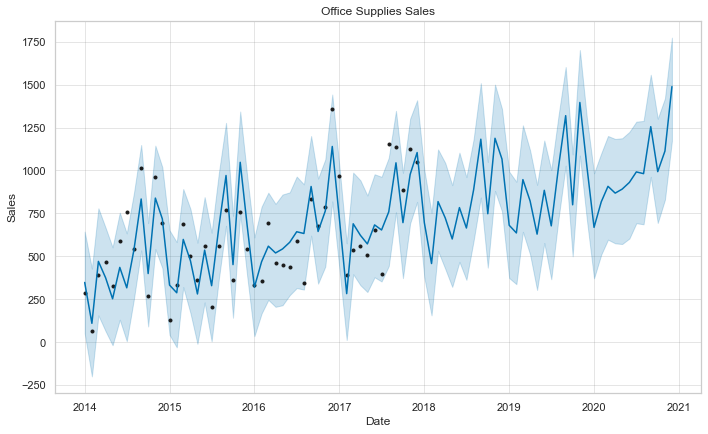

In [123]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

<Figure size 1296x432 with 0 Axes>

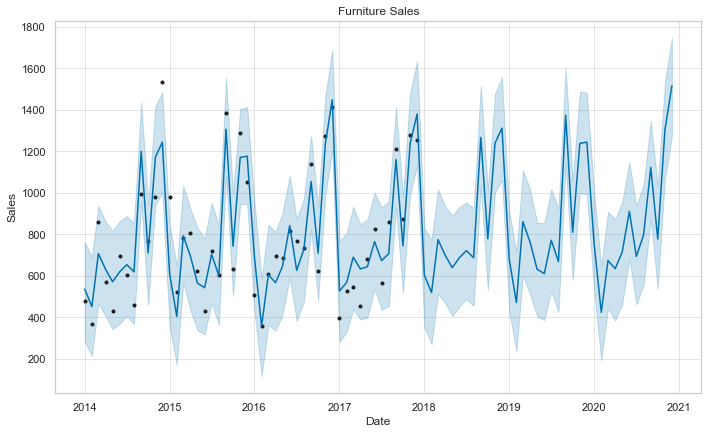

In [124]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [125]:
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]

merge_technology_forecast = technology_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()

merge_technology_forecast.columns = technology_names
merge_office_forecast.columns = office_names
merge_furniture_forecast.columns = furniture_names

forecast = pd.merge(merge_technology_forecast, merge_office_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'office_ds')
forecast = pd.merge(merge_furniture_forecast, forecast, how='inner', left_on='furniture_ds', right_on='technology_ds')
forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()



,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,283.491940,761.943565,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,212.673886,691.014679,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,466.138176,937.024776,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,404.503322,861.428031,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,341.960306,818.025165,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


In [126]:
forecast

,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,283.491940,761.943565,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,212.673886,691.014679,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,466.138176,937.024776,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,404.503322,861.428031,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,341.960306,818.025165,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-08-01,837.441201,555.495410,1038.377771,837.441126,837.441281,-41.282256,-41.282256,-41.282256,-41.282256,...,-79.557741,-79.557741,-79.557741,-79.557741,-79.557741,-79.557741,0.0,0.0,0.0,981.437464
80,2020-09-01,838.877511,871.651295,1345.256889,838.877431,838.877595,282.865686,282.865686,282.865686,282.865686,...,186.934428,186.934428,186.934428,186.934428,186.934428,186.934428,0.0,0.0,0.0,1255.328019
81,2020-10-01,840.267488,536.836305,1031.921020,840.267404,840.267575,-63.840536,-63.840536,-63.840536,-63.840536,...,-82.396828,-82.396828,-82.396828,-82.396828,-82.396828,-82.396828,0.0,0.0,0.0,993.156492
82,2020-11-01,841.703797,1068.122488,1533.010963,841.703710,841.703890,461.298523,461.298523,461.298523,461.298523,...,30.013340,30.013340,30.013340,30.013340,30.013340,30.013340,0.0,0.0,0.0,1112.965047


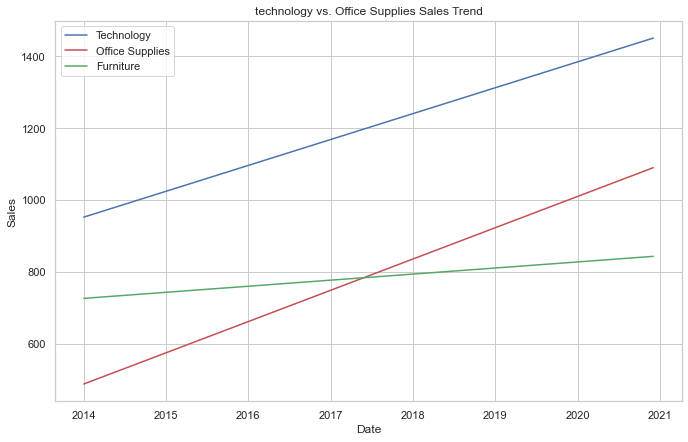

In [127]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_trend'], 'b-', label='Technology')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-', label='Office Supplies')
plt.plot(forecast['Date'], forecast['furniture_trend'], 'g-', label='Furniture')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('technology vs. Office Supplies Sales Trend');

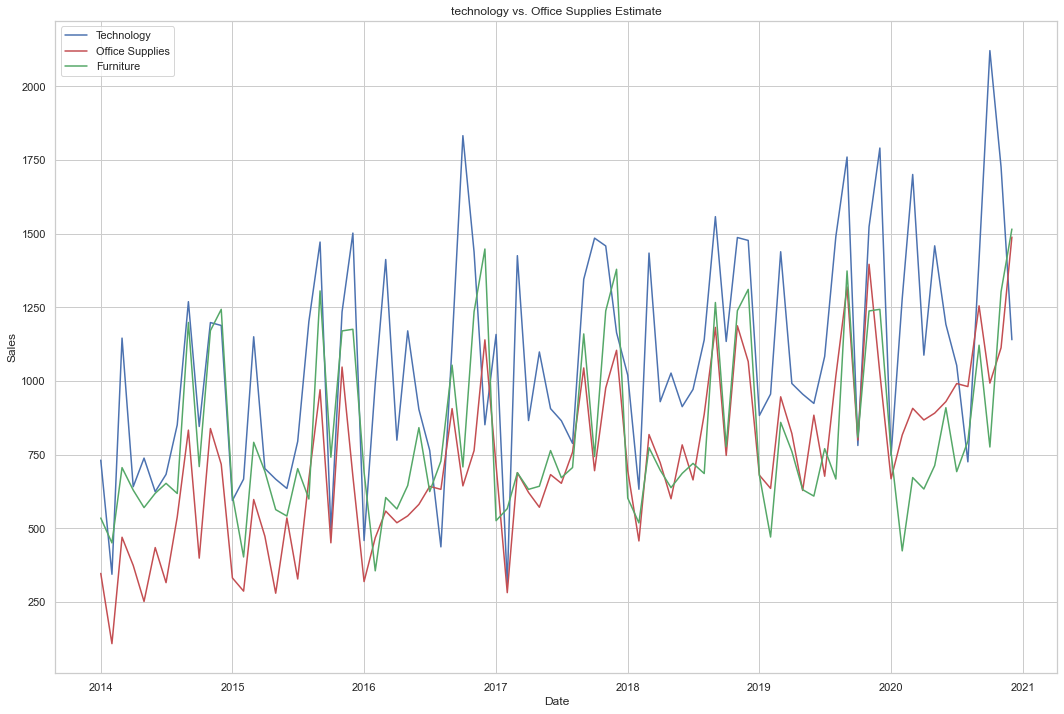

In [128]:
plt.figure(figsize=(16, 12))
plt.plot(forecast['Date'], forecast['technology_yhat'], 'b-', label='Technology')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-', label='Office Supplies')
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'g-', label='Furniture')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('technology vs. Office Supplies Estimate');

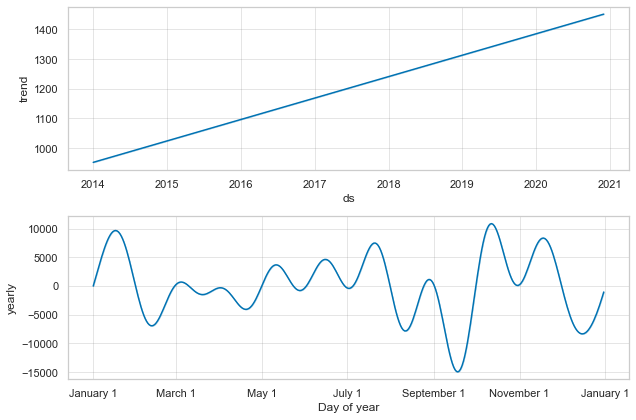

In [129]:
technology_model.plot_components(technology_forecast);

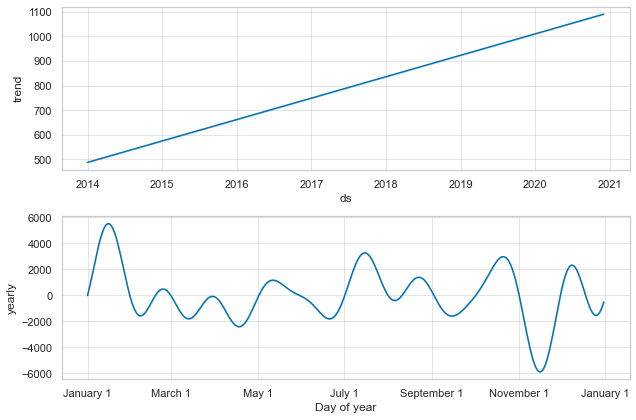

In [130]:
office_model.plot_components(office_forecast);

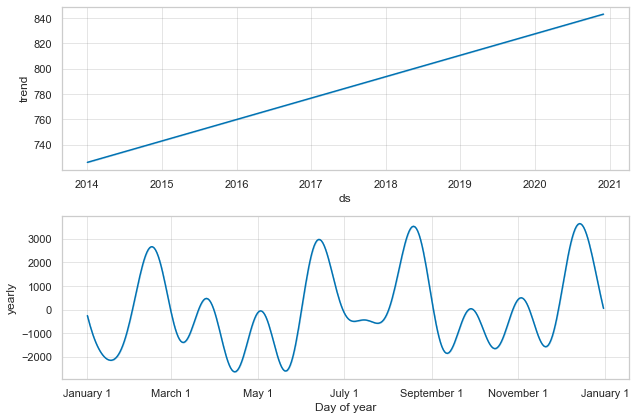

In [131]:
furniture_model.plot_components(furniture_forecast);

### Appendix A: ARIMA Model <a id='ARIMA'></a>

[ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) is short for ‘Auto Regressive Integrated Moving Average’ which is fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. Seasonal ARIMA models are usually denoted ARIMA(p,d,q)(P,D,Q)$_m$, where m refers to the number of periods in each season, and the uppercase P,D,Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.

Given time series data $X_t$ where $t$ is an integer index and the $X_t$ are real numbers, an ${\displaystyle {\text{ARMA}}(p',q)}{\displaystyle {\text{ARMA}}(p',q)}$ model is given by

${\displaystyle X_{t}-\alpha _{1}X_{t-1}-\dots -\alpha _{p'}X_{t-p'}=\varepsilon _{t}+\theta _{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q},}$

or equivalently by

$\left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)X_{t}=\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}\,$

where ${\displaystyle L}L$ is the lag operator, the ${\displaystyle \alpha _{i}}\alpha _{i}$ are the parameters of the autoregressive part of the model, the ${\displaystyle \theta _{i}}\theta _{i}$ are the parameters of the moving average part and the ${\displaystyle \varepsilon _{t}}\varepsilon _{t}$ are error terms. The error terms ${\displaystyle \varepsilon _{t}}\varepsilon _{t}$ are generally assumed to be independent, identically distributed variables sampled from a normal distribution with zero mean.

Assume now that the polynomial ${\displaystyle \textstyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)}$ ${\displaystyle \textstyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)} $has a unit root (a factor ${\displaystyle (1-L)}{\displaystyle (1-L)}$) of multiplicity $d$. Then it can be rewritten as:

${\displaystyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)=\left(1-\sum _{i=1}^{p'-d}\varphi _{i}L^{i}\right)\left(1-L\right)^{d}.}$

An ARIMA(p,d,q) process expresses this polynomial factorisation property with $p=p'−d$, and is given by:

${\displaystyle \left(1-\sum _{i=1}^{p}\varphi _{i}L^{i}\right)(1-L)^{d}X_{t}=\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}\,}$

and thus can be thought as a particular case of an ARMA(p+d,q) process having the autoregressive polynomial with $d $ unit roots. (For this reason, no process that is accurately described by an ARIMA model with $d > 0$ is wide-sense stationary.)

The above can be generalized as follows.

${\displaystyle \left(1-\sum _{i=1}^{p}\varphi _{i}L^{i}\right)(1-L)^{d}X_{t}=\delta +\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}.\,}$

This defines an ARIMA(p,d,q) process with drift ${\displaystyle {\frac {\delta }{1-\sum \varphi _{i}}}}$.